<div style="text-align: right">정보통계학과 2018015030 이광진</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
health=pd.read_csv("health.csv")

In [3]:
health.shape

(97787, 113)

In [4]:
print(health.head())

    학년도      최종가중치  학교ID  strata         도시규모   공학여부  시도 학교급  학년  반  ...  \
0  2021  34.687664   706     129  1. 대도시/중소도시  1. 공학  충북   초   1  1  ...   
1  2021  41.323936   384     104  1. 대도시/중소도시  1. 공학  대전   초   1  1  ...   
2  2021  24.419891  1063     123  1. 대도시/중소도시  1. 공학  제주   초   1  1  ...   
3  2021  22.338629   481     109  1. 대도시/중소도시  1. 공학  세종   초   1  3  ...   
4  2021  43.717056   826     120  1. 대도시/중소도시  1. 공학  전북   초   1  1  ...   

   가족음주 흡연음주전문가상담희망  무기력감  수업태도교정  과잉행동  주의력산만 성문제전문가상담희망  진로고민  상담요청_초  \
0   2.0         NaN   2.0     2.0   2.0    2.0        NaN   NaN     2.0   
1   2.0         NaN   2.0     2.0   2.0    2.0        NaN   NaN     2.0   
2   2.0         NaN   2.0     2.0   2.0    2.0        NaN   NaN     2.0   
3   2.0         NaN   2.0     2.0   2.0    2.0        NaN   NaN     2.0   
4   2.0         NaN   2.0     2.0   1.0    2.0        NaN   NaN     2.0   

   상담요청_중고  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 113

In [5]:
health.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97787 entries, 0 to 97786
Data columns (total 113 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    학년도             97787 non-null  int64  
 1    최종가중치           97787 non-null  float64
 2    학교ID            97787 non-null  int64  
 3    strata          97787 non-null  int64  
 4    도시규모            97787 non-null  object 
 5    공학여부            97787 non-null  object 
 6    시도              97787 non-null  object 
 7    학교급             97787 non-null  object 
 8    학년              97787 non-null  int64  
 9    반               97787 non-null  int64  
 10   순번              97787 non-null  int64  
 11   성별              97787 non-null  object 
 12   생년월일            97787 non-null  int64  
 13   건강검진일           97786 non-null  float64
 14   키               97787 non-null  float64
 15   몸무게             97787 non-null  float64
 16   척추              32230 non-null  object 
 17   시력_나안_좌   

In [6]:
health=health.rename(columns={"주3회이상운동":"주3회이상운동_초",  "하루30분이상운동":"하루30분이상운동_중고",
                             "외상치료경험":"외상치료경험_중고","하루tv시청2시간이상":"하루tv시청2시간이상_초",
                             "음란물채팅":"음란물채팅_중고","현금갈취":"현금갈취_초",
                             "신체접촉":"신체접촉_초","고민상담대상":"고민상담대상_중고",
                             "가족지지":"가족지지_초","체벌경험":"체벌경험_초",
                             "폭력위협":"폭력위협_중고","가족흡연":"가족흡연_초",
                             "가족음주":"가족음주_초","흡연음주전문가상담희망":"흡연음주전문가상담희망_중고",
                             "무기력감":"무기력감_초","수업태도교정":"수업태도교정_초",
                             "성문제전문가상담희망":"성문제전문가상담희망_중고",
                             "진로고민":"진로고민_중고","과잉행동":"과잉행동_부모님란",
                             "주의력산만":"주의력산만_부모님란"})

In [7]:
health.columns

Index(['학년도', '최종가중치', '학교ID', 'strata', '도시규모', '공학여부', '시도', '학교급', '학년',
       '반',
       ...
       '가족음주_초', '흡연음주전문가상담희망_중고', '무기력감_초', '수업태도교정_초', '과잉행동_부모님란',
       '주의력산만_부모님란', '성문제전문가상담희망_중고', '진로고민_중고', '상담요청_초', '상담요청_중고'],
      dtype='object', length=113)

In [8]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_row",45)

* **열과 행이 너무 길어 확인할 수 있는 열의 범위와 행의 범위를 늘려준다.**

### (2) drop(불필요한 열 제거)

In [9]:
health_drop=health[[#'학년도', '최종가중치', '학교ID', 'strata', #'공학여부', #'반', '순번', 
        '도시규모',  '시도', '학교급', '학년','성별', '키', '몸무게','수축기', '이완기',
   #'생년월일', '건강검진일', # '척추', '시력_나안_좌',# '허리둘레', '기타', '건강검진_종합소견',
       #'시력_나안_우', '시력_교정_좌', '시력_교정_우', '안질환', '청력_좌', '청력_우', '귓병', '콧병',
       #'목병', '피부병', '요단백', '요잠혈',  #'혈당(식전)(mg_dl)', '총콜레스테롤(mg_dl)',
       #'hdl(mg_dl)', '중성지방(mg_dl)', 'ldl(mg_dl)', 'AST(U_L)', 'ALT(U_L)',  '혈색소(g_dl)', '결핵흉부방사선검사',   
       '충치치아_유무', '충치치아_개수_상', '충치치아_개수_하', '충치발생위험치아_유무', '충치발생위험치아_개수_상',
       '충치발생위험치아_개수_하', '결손치아영구치아_유무', '결손치아영구치아__개수_상', '결손치아영구치아__개수_하',
       #'구내염및연조직질환', '부정교합', '구강위생상태', '그밖의치아상태', '치주질환잇몸병_유무', '치주질환_종류',
       #'턱관절이상', '치아마모증', '제3대구치사랑니', '구강검진_종합소견', '구강검진일',# '하루30분이상운동_중',
        '라면', '음료수','패스트푸드', '육류', '우유유제품', '과일', '채소(김치제외)', '아침식사', '다이어트경험_답변1',  
       '다이어트경험_답변2', '다이어트경험_답변3', '다이어트경험_답변4', '주3회이상운동_초','하루수면량',
        #'자아신체상(체형)', '손씻기', '양치질', '안전벨트착용', '안전장비착용', '외상치료경험_중고',# '상담희망_중고',
       '하루tv시청2시간이상_초', '하루2시간이상게임_초', '상담희망_초',   '가족흡연_초',   '가족음주_초',
    '괴롭힘따돌림_초', '현금갈취_초', '신체접촉_초', '가출생각_초', '가족지지_초', '체벌경험_초',   
       #'폭력위협_중고', #'괴롭힘따돌림_중고',#'가출생각_중고', '고민상담대상_중고',# '하루2시간이상게임_중고', '음란물채팅_중고', ,  '가정문제걱정'
    # '흡연음주전문가상담희망_중고',# '과잉행동_부모님란','주의력산만_부모님란', #'성문제전문가상담희망_중고', '진로고민_중고', #, '상담요청_중고']]
    '무기력감_초', '수업태도교정_초','상담요청_초']]

In [10]:
health_drop.columns

Index(['도시규모', '시도', '학교급', '학년', '성별', '키', '몸무게', '수축기', '이완기', '충치치아_유무',
       '충치치아_개수_상', '충치치아_개수_하', '충치발생위험치아_유무', '충치발생위험치아_개수_상',
       '충치발생위험치아_개수_하', '결손치아영구치아_유무', '결손치아영구치아__개수_상', '결손치아영구치아__개수_하',
       '라면', '음료수', '패스트푸드', '육류', '우유유제품', '과일', '채소(김치제외)', '아침식사',
       '다이어트경험_답변1', '다이어트경험_답변2', '다이어트경험_답변3', '다이어트경험_답변4', '주3회이상운동_초',
       '하루수면량', '하루tv시청2시간이상_초', '하루2시간이상게임_초', '상담희망_초', '가족흡연_초', '가족음주_초',
       '괴롭힘따돌림_초', '현금갈취_초', '신체접촉_초', '가출생각_초', '가족지지_초', '체벌경험_초', '무기력감_초',
       '수업태도교정_초', '상담요청_초'],
      dtype='object')

### (3) data manipulation

In [11]:
health_drop_ele=health_drop[health_drop['학교급']=='초']
health_drop_ele=health_drop_ele.copy()

In [12]:
health_drop_ele['bmi']=health_drop_ele['몸무게']/((health_drop_ele['키']/100)**2)
health_drop_ele['bmi']

0        16.528926
1        17.888637
2        18.269083
3        15.802112
4        16.148774
           ...    
38443    23.808022
38444    17.426325
38445    20.692479
38446    21.316255
38447    18.569532
Name: bmi, Length: 38448, dtype: float64

In [13]:
health_drop_ele.describe()

학년             키           몸무게           수축기           이완기  \
count  38448.000000  38448.000000  38448.000000  12105.000000  12105.000000   
mean       3.497321    137.735079     37.094083     97.099314     59.295679   
std        1.703667     12.275926     12.476537     13.288884     10.331656   
min        1.000000    101.900000     14.600000     11.000000      6.000000   
25%        2.000000    128.000000     27.400000     90.000000     55.000000   
50%        4.000000    137.100010     34.799999     98.000000     60.000000   
75%        5.000000    147.000000     44.400002    104.000000     64.000000   
max        6.000000    179.800000    110.600000    914.000000    663.000000   

          충치치아_개수_상     충치치아_개수_하  충치발생위험치아_개수_상  충치발생위험치아_개수_하  \
count  18568.000000  18399.000000   17365.000000   17417.000000   
mean       0.537268      0.498179       0.350993       0.368663   
std        1.067804      0.993448       0.744623       0.753716   
min        0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000       0.000000       0.000000   
50%        0.000000      0.000000       0.000000       0.000000   
75%        1.000000      1.000000       0.000000       0.000000   
max       11.000000      9.000000       8.000000       8.000000   

       결손치아영구치아__개수_상  결손치아영구치아__개수_하            라면           음료수  \
count    14720.000000    14775.000000  37333.000000  37333.000000   
mean         0.010870        0.020846      1.858784      2.091313   
std          0.133484        0.185719      0.499853      0.711219   
min          0.000000        0.000000      1.000000      1.000000   
25%          0.000000        0.000000      2.000000      2.000000   
50%          0.000000        0.000000      2.000000      2.000000   
75%          0.000000        0.000000      2.000000      2.000000   
max          4.000000        5.000000      4.000000      4.000000   

              패스트푸드            육류         우유유제품            과일      채소(김치제외)  \
count  37330.000000  37333.000000  37332.000000  37332.000000  37330.000000   
mean       1.795339      2.705381      2.961534      2.948382      2.823841   
std        0.517900      0.692417      0.911014      0.834445      0.883615   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      2.000000      2.000000      2.000000      2.000000   
50%        2.000000      3.000000      3.000000      3.000000      3.000000   
75%        2.000000      3.000000      4.000000      4.000000      4.000000   
max        4.000000      4.000000      4.000000      4.000000      4.000000   

               아침식사  다이어트경험_답변1  다이어트경험_답변2  다이어트경험_답변3  다이어트경험_답변4  \
count  37288.000000     23802.0      5776.0       175.0     10338.0   
mean       1.650933         1.0         2.0         3.0         4.0   
std        0.947527         0.0         0.0         0.0         0.0   
min        1.000000         1.0         2.0         3.0         4.0   
25%        1.000000         1.0         2.0         3.0         4.0   
50%        1.000000         1.0         2.0         3.0         4.0   
75%        2.000000         1.0         2.0         3.0         4.0   
max        4.000000         1.0         2.0         3.0         4.0   

          주3회이상운동_초         하루수면량  하루tv시청2시간이상_초   하루2시간이상게임_초        상담희망_초  \
count  37297.000000  37331.000000   37320.000000  37350.000000  37330.000000   
mean       1.410060      3.378077       1.668891      1.613253      1.985534   
std        0.491851      0.773348       0.470960      0.487011      0.119401   
min        1.000000      1.000000       1.000000      1.000000      1.000000   
25%        1.000000      3.000000       1.000000      1.000000      2.000000   
50%        1.000000      4.000000       2.000000      2.000000      2.000000   
75%        2.000000      4.000000       2.000000      2.000000      2.000000   
max        2.000000      4.000000       4.000000      2.000000      2.000000   

      

### (5) 변수 추가 및 data manipulation

In [14]:
def condition(data) :
    if data['성별']=='남':
        if data['학년'] == 1:
            if data['bmi'] < 13.93:
                val = '저체중'
            elif 13.93 <= data['bmi'] < 18.86:
                val = '정상'
            elif 18.86 <= data['bmi'] < 20.93:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 2:
            if data['bmi'] < 14.06:
                val = '저체중'
            elif 14.06 <= data['bmi'] < 19.80:
                val = '정상'
            elif 19.80 <= data['bmi'] < 22.13:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 3:
            if data['bmi'] < 14.27:
                val = '저체중'
            elif 14.27 <= data['bmi'] < 20.76:
                val = '정상'
            elif 20.76 <= data['bmi'] < 23.34:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 4:
            if data['bmi'] < 14.57:
                val = '저체중'
            elif 14.57 <= data['bmi'] < 21.71:
                val = '정상'
            elif 21.71 <= data['bmi'] < 24.48:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 5:
            if data['bmi'] < 14.93:
                val = '저체중'
            elif 14.93 <= data['bmi'] < 22.57:
                val = '정상'
            elif 22.57 <= data['bmi'] < 25.5:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 6:
            if data['bmi'] < 15.35:
                val = '저체중'
            elif 15.35 <= data['bmi'] < 23.32:
                val = '정상'
            elif 23.32 <= data['bmi'] < 26.35:
                val = '과체중'
            else :
                val = '비만'
            return val
    else :
        if data['학년'] == 1:
            if data['bmi'] < 13.63:
                val = '저체중'
            elif 13.63 <= data['bmi'] < 18.27:
                val = '정상'
            elif 18.27 <= data['bmi'] < 20.05:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 2:
            if data['bmi'] < 13.77:
                val = '저체중'
            elif 13.77 <= data['bmi'] < 19.05:
                val = '정상'
            elif 19.05 <= data['bmi'] < 21.05:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 3:
            if data['bmi'] < 14.01:
                val = '저체중'
            elif 14.01 <= data['bmi'] < 19.88:
                val = '정상'
            elif 19.88 <= data['bmi'] < 22.09:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 4:
            if data['bmi'] < 14.33:
                val = '저체중'
            elif 14.33 <= data['bmi'] < 20.71:
                val = '정상'
            elif 20.71 <= data['bmi'] < 23.08:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 5:
            if data['bmi'] < 14.73:
                val = '저체중'
            elif 14.73 <= data['bmi'] < 21.51:
                val = '정상'
            elif 21.51 <= data['bmi'] < 23.99:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 6:
            if data['bmi'] < 15.20:
                val = '저체중'
            elif 15.2 <= data['bmi'] < 22.22:
                val = '정상'
            elif 22.22 <= data['bmi'] < 24.77:
                val = '과체중'
            else :
                val = '비만'
            return val

In [15]:
health_drop_ele['bmi_등급']=health_drop_ele.apply(condition,axis=1)

In [16]:
health_drop_ele['bmi_등급']

0         정상
1         정상
2         정상
3         정상
4         정상
        ... 
38443    과체중
38444     정상
38445     정상
38446     정상
38447     정상
Name: bmi_등급, Length: 38448, dtype: object

In [17]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

### (7) 데이터 타입 변경, 결측값 대치

<AxesSubplot: >

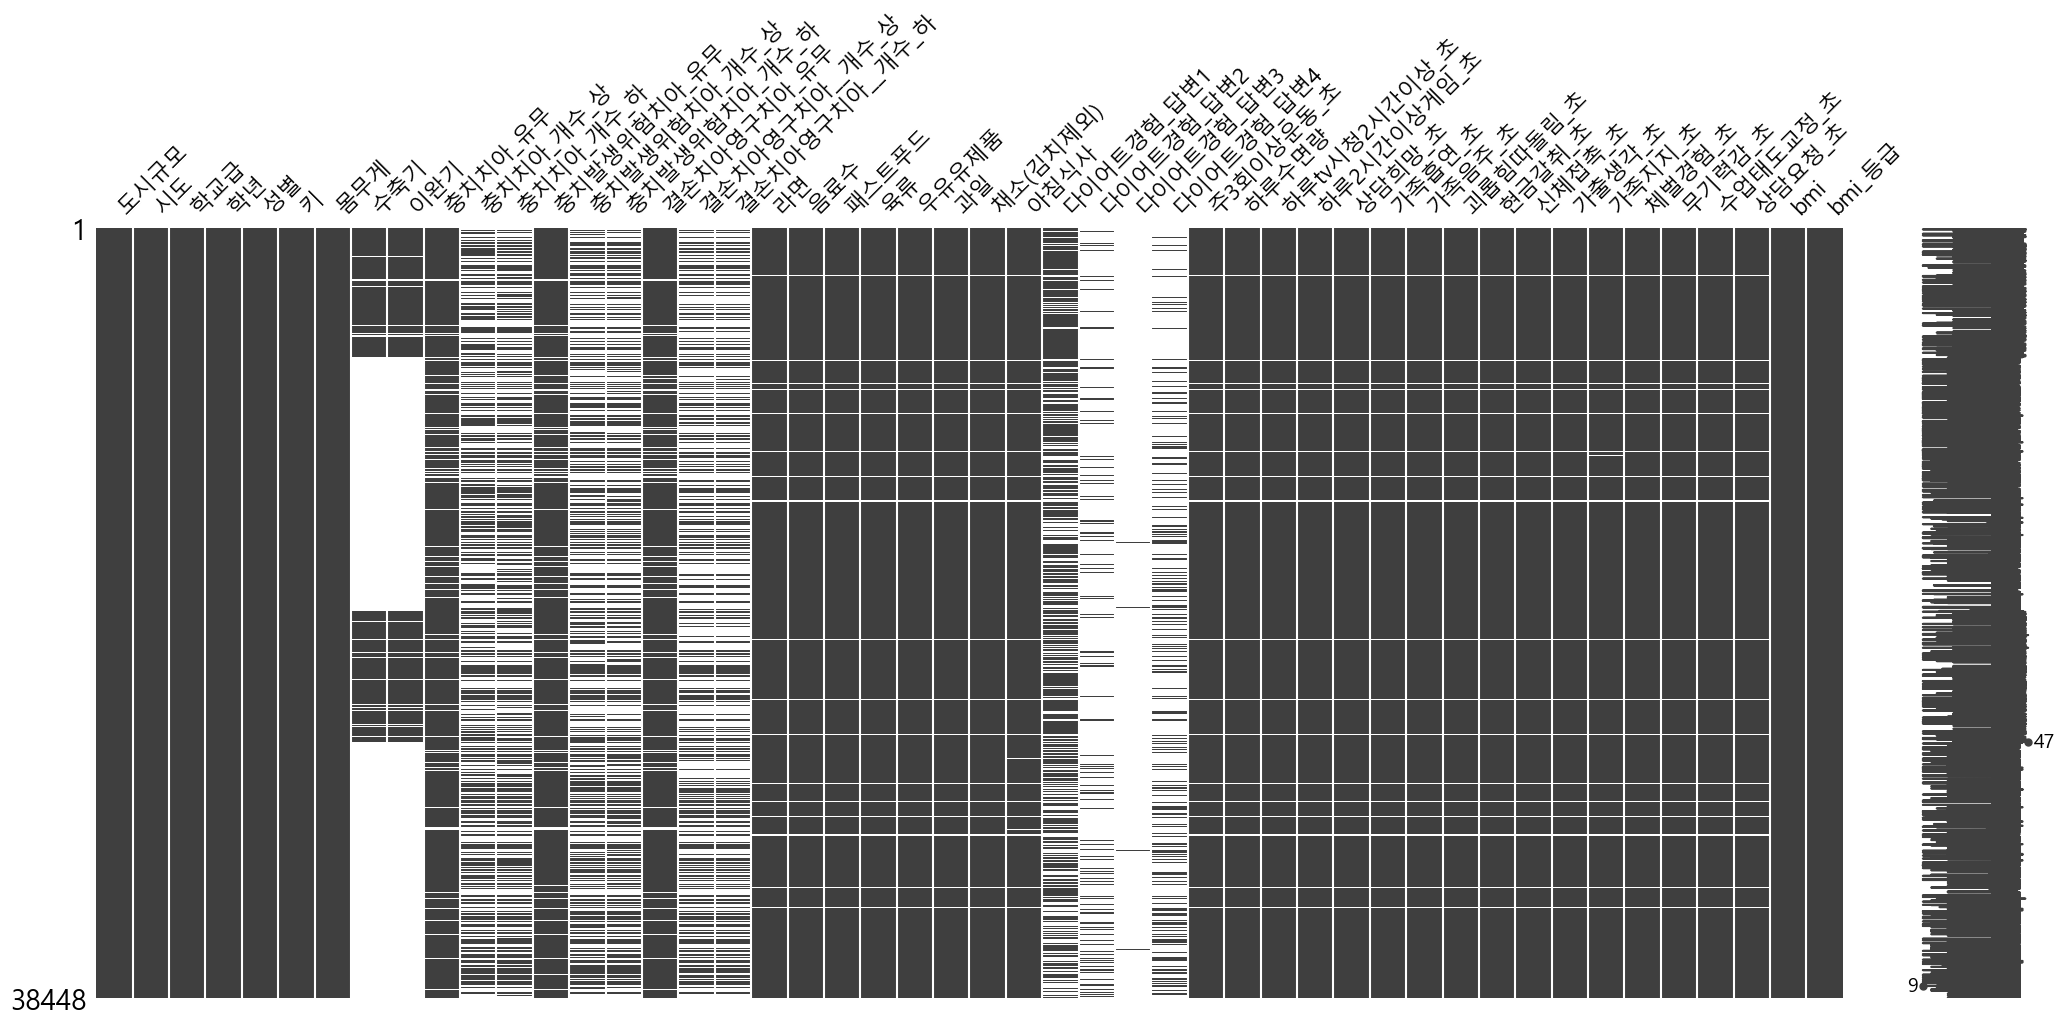

In [18]:
import missingno as msno
import matplotlib.pyplot as plt

# 예시 데이터셋을 사용하거나 실제 데이터셋을 불러와서 사용합니다.
# 예시 데이터셋을 사용하려면 seaborn 라이브러리를 설치해야 합니다.
# pip install seaborn
import seaborn as sns

msno.matrix(health_drop_ele)

In [19]:
float_cols_to_convert=['하루tv시청2시간이상_초', '하루2시간이상게임_초', '괴롭힘따돌림_초', '현금갈취_초', '신체접촉_초',
       '가출생각_초', '가족지지_초', '체벌경험_초', '상담희망_초', '가족흡연_초', '가족음주_초', '무기력감_초',
       '수업태도교정_초', '상담요청_초']
health_drop_ele.dropna(subset=float_cols_to_convert,inplace=True)

health_drop_ele.loc[:, float_cols_to_convert] = health_drop_ele.loc[:, float_cols_to_convert].round().astype(int)

In [20]:
float_cols=['충치치아_개수_상', '충치치아_개수_하',  '충치발생위험치아_개수_상',
       '충치발생위험치아_개수_하',  '결손치아영구치아__개수_상', '결손치아영구치아__개수_하',]
health_drop_ele.dropna(subset=float_cols, inplace=True)
health_drop_ele.loc[:, float_cols] = health_drop_ele.loc[:, float_cols].round().astype(int)

In [21]:
# 문제가 있는 치아 개수가 NAN인 경우 문제가 있는 치아 개수가 없어 작성하지 않았다고 판단하여 NAN값에 0을 대입하였다.
float_cols=['충치치아_개수_상', '충치치아_개수_하',  '충치발생위험치아_개수_상',
       '충치발생위험치아_개수_하',  '결손치아영구치아__개수_상', '결손치아영구치아__개수_하',]
health_drop_ele[float_cols] = health_drop_ele[float_cols].fillna(0)
health_drop_ele.loc[:, float_cols] = health_drop_ele.loc[:, float_cols].round().astype(int)

In [22]:
float_cols=['라면', '음료수', '패스트푸드', '육류', '우유유제품', '과일', '채소(김치제외)', '아침식사',"하루수면량","주3회이상운동_초"]
health_drop_ele.dropna(subset=float_cols, inplace=True)
health_drop_ele[float_cols] = health_drop_ele[float_cols].astype(int)

In [23]:
health_drop_ele_tv=health_drop_ele[health_drop_ele['하루tv시청2시간이상_초']==4]
health_drop_ele.drop(index=health_drop_ele_tv.index, inplace=True)

In [24]:
health_drop_ele.dropna(subset=['수축기','이완기','충치치아_유무','충치발생위험치아_유무','결손치아영구치아_유무'],inplace=True)
a=health_drop_ele[health_drop_ele['충치치아_유무']=="검사안함"]
health_drop_ele.drop(index=a.index,inplace=True)

In [25]:
health_drop_ele['다이어트경험_답변1'] = health_drop_ele['다이어트경험_답변1'].fillna(0).astype(int)

health_drop_ele['다이어트경험_답변2'] = health_drop_ele['다이어트경험_답변2'].fillna(0).astype(int)
health_drop_ele['다이어트경험_답변2'] = health_drop_ele['다이어트경험_답변2'].replace(2, 1)

health_drop_ele['다이어트경험_답변3'] = health_drop_ele['다이어트경험_답변3'].fillna(0).astype(int)
health_drop_ele['다이어트경험_답변3'] = health_drop_ele['다이어트경험_답변3'].replace(3, 1)

health_drop_ele['다이어트경험_답변4'] = health_drop_ele['다이어트경험_답변4'].fillna(0).astype(int)
health_drop_ele['다이어트경험_답변4'] = health_drop_ele['다이어트경험_답변4'].replace(4, 1)

In [26]:
health_drop_ele.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4766 entries, 12 to 25686
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   도시규모            4766 non-null   object 
 1   시도              4766 non-null   object 
 2   학교급             4766 non-null   object 
 3   학년              4766 non-null   int64  
 4   성별              4766 non-null   object 
 5   키               4766 non-null   float64
 6   몸무게             4766 non-null   float64
 7   수축기             4766 non-null   float64
 8   이완기             4766 non-null   float64
 9   충치치아_유무         4766 non-null   object 
 10  충치치아_개수_상       4766 non-null   int32  
 11  충치치아_개수_하       4766 non-null   int32  
 12  충치발생위험치아_유무     4766 non-null   object 
 13  충치발생위험치아_개수_상   4766 non-null   int32  
 14  충치발생위험치아_개수_하   4766 non-null   int32  
 15  결손치아영구치아_유무     4766 non-null   object 
 16  결손치아영구치아__개수_상  4766 non-null   int32  
 17  결손치아영구치아__개수_하  4766 non-null  

### (8) 인코딩

In [27]:
health_drop_ele.replace({'충치치아_유무': {'무': 0}}, inplace = True)
health_drop_ele.replace({'충치치아_유무': {'유': 1}}, inplace = True)
health_drop_ele.replace({'충치발생위험치아_유무': {'무': 0}}, inplace = True)
health_drop_ele.replace({'충치발생위험치아_유무': {'유': 1}}, inplace = True)
health_drop_ele.replace({'결손치아영구치아_유무': {'무': 0}}, inplace = True)
health_drop_ele.replace({'결손치아영구치아_유무': {'유': 1}}, inplace = True)

### (9) 이상치 제거

In [28]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

Text(0.5, 1.0, '이완기의 boxplot')

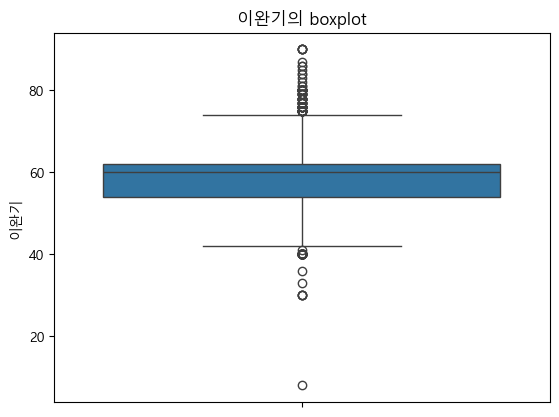

In [29]:
sns.boxplot(y=health_drop_ele['이완기'])
plt.title("이완기의 boxplot")

Text(0.5, 1.0, '수축기의 boxplot')

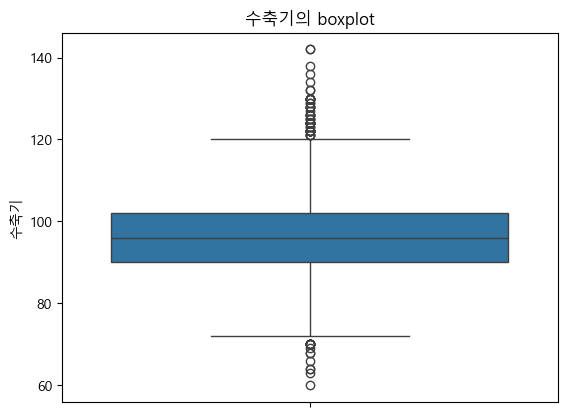

In [30]:
sns.boxplot(y=health_drop_ele['수축기'])
plt.title("수축기의 boxplot")

<AxesSubplot: ylabel='이완기'>

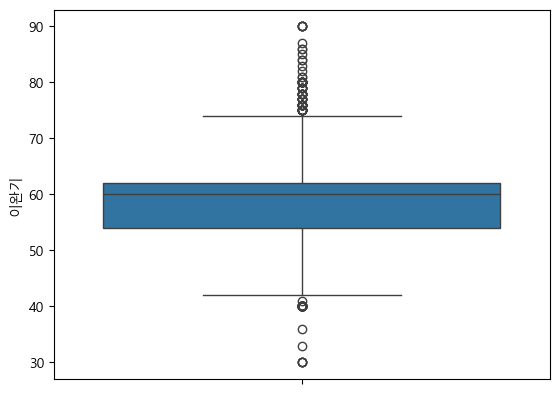

In [31]:
health_drop_ele_e=health_drop_ele["이완기"][health_drop_ele['이완기']<20]
health_drop_ele.drop(index=health_drop_ele_e.index, inplace=True)
sns.boxplot(y=health_drop_ele['이완기'])

In [32]:
health_drop_ele_su=health_drop_ele["수축기"][health_drop_ele['수축기']<40]
health_drop_ele.drop(index=health_drop_ele_su.index, inplace=True)

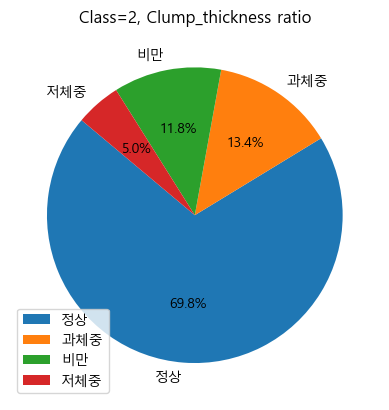

In [33]:
fig, ax1 = plt.subplots()
health_grade=health_drop_ele["bmi_등급"].value_counts()
ax1.pie(health_grade, labels=health_grade.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 10})
ax1.set_title('Class=2, Clump_thickness ratio')
ax1.legend(health_grade.index, title='', loc='best')
plt.show()

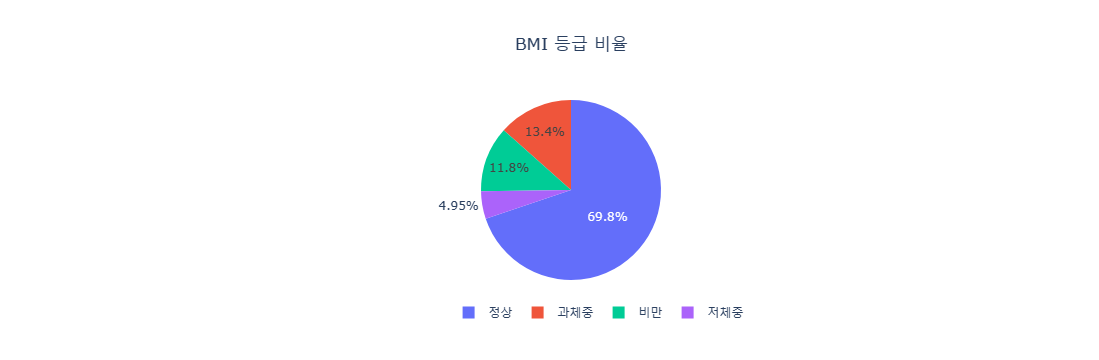

In [34]:
import plotly.graph_objs as go

health_grade = health_drop_ele["bmi_등급"].value_counts()
fig = go.Figure(data=[go.Pie(labels=health_grade.index, values=health_grade)])
fig.update_layout(title_text='BMI 등급 비율',title_x=0.52,legend=dict(x=0.3, y=-0.1, orientation='h'))

fig.show()

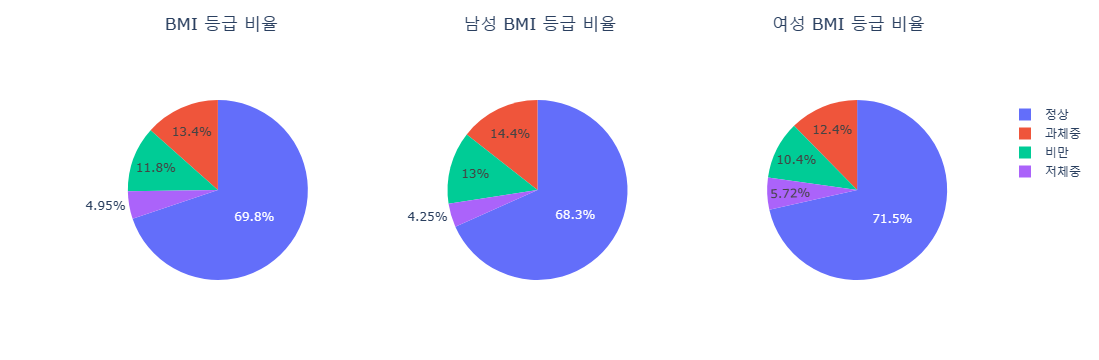

In [35]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# BMI 등급에 대한 데이터
health_grade = health_drop_ele["bmi_등급"].value_counts()

# 첫 번째 그래프에 BMI 등급 비율을 추가합니다.
fig.add_trace(go.Pie(labels=health_grade.index, values=health_grade, name="BMI 등급 비율"),
              row=1, col=1)

# 남성과 여성에 대한 데이터를 분리합니다.
health_grade_M = health_drop_ele[health_drop_ele["성별"] == "남"]
health_grade_W = health_drop_ele[health_drop_ele["성별"] == "여"]

# 두 번째 그래프에 남성 BMI 등급 비율을 추가합니다.
fig.add_trace(go.Pie(labels=health_grade_M["bmi_등급"].value_counts().index,
                     values=health_grade_M["bmi_등급"].value_counts(), name="남성 BMI 등급 비율"),
              row=1, col=2)

# 세 번째 그래프에 여성 BMI 등급 비율을 추가합니다.
fig.add_trace(go.Pie(labels=health_grade_W["bmi_등급"].value_counts().index,
                     values=health_grade_W["bmi_등급"].value_counts(), name="여성 BMI 등급 비율"),
              row=1, col=3)
fig.update_layout( 
    title_text=" BMI 등급 비율                               남성 BMI 등급 비율                          여성 BMI 등급 비율",title_x=0.15, title_y=0.95,
    )   
# 그래프를 표시합니다.
fig.show()

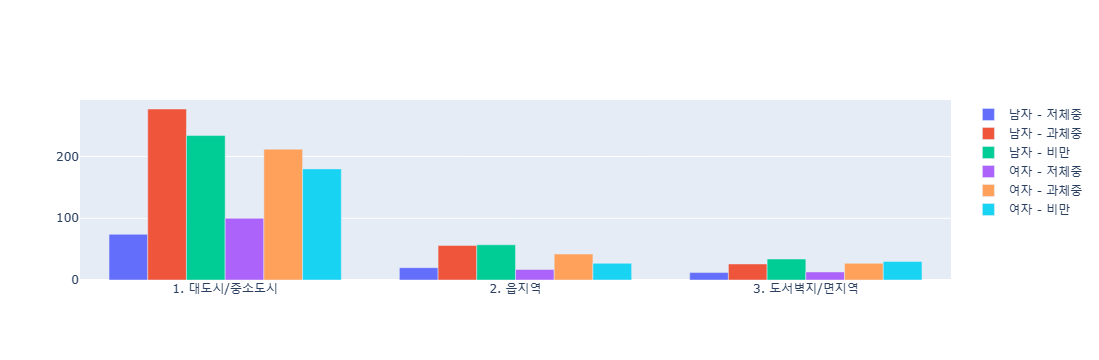

In [36]:
import plotly.graph_objs as go
branches = health_drop_ele["도시규모"].unique()

a=health_drop_ele[health_drop_ele['성별']=='남']
b=health_drop_ele[health_drop_ele['성별']=='여']

fy = a.groupby(['도시규모', 'bmi_등급']).size().unstack(fill_value=0)
sy = b.groupby(['도시규모', 'bmi_등급']).size().unstack(fill_value=0)

trace2 = go.Bar(
    x=branches,
    y=fy['저체중'],
    name='남자 - 저체중'
)
trace3 = go.Bar(
    x=branches,
    y=fy['과체중'],
    name='남자 - 과체중'
)
trace4 = go.Bar(
    x=branches,
    y=fy['비만'],
    name='남자 - 비만'
)

trace6 = go.Bar(
    x=branches,
    y=sy['저체중'],
    name='여자 - 저체중'
)
trace7 = go.Bar(
    x=branches,
    y=sy['과체중'],
    name='여자 - 과체중'
)
trace8 = go.Bar(
    x=branches,
    y=sy['비만'],
    name='여자 - 비만'
)


data = [ trace2, trace3, trace4,  trace6, trace7, trace8]
layout = go.Layout(barmode='group', title='')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [37]:
print(a[(a['성별'] == '남')& (a['시도']=='대구')].groupby(['시도', 'bmi_등급']).size())
print(branches)
print(fy)

시도  bmi_등급
대구  과체중        46
    비만         34
    저체중         7
    정상        196
dtype: int64
['1. 대도시/중소도시' '2. 읍지역' '3. 도서벽지/면지역']
bmi_등급       과체중   비만  저체중    정상
도시규모                            
1. 대도시/중소도시  277  234   74  1277
2. 읍지역        56   57   20   256
3. 도서벽지/면지역   26   34   12   170


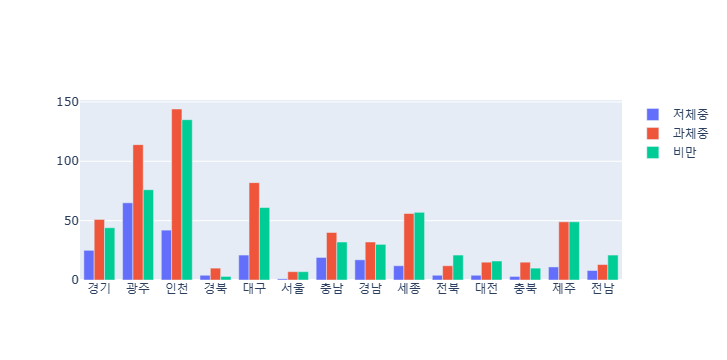

In [38]:
import plotly.graph_objs as go

branches = health_drop_ele["시도"].unique()

# a=health_drop_ele[health_drop_ele['성별']=='남']
# b=health_drop_ele[health_drop_ele['성별']=='여']
fy = health_drop_ele.groupby(['시도', 'bmi_등급']).size().unstack(fill_value=0)
 # sy = b.groupby(['시도', 'bmi_등급']).size().unstack(fill_value=0)

trace1 = go.Bar(
    x=branches,
    y=fy['정상'],
    name='정상'
    
)
trace2 = go.Bar(
    x=branches,
    y=fy['저체중'],
    name='저체중'
)
trace3 = go.Bar(
    x=branches,
    y=fy['과체중'],
    name='과체중'
)
trace4 = go.Bar(
    x=branches,
    y=fy['비만'],
    name='비만'
)
data = [trace2, trace3, trace4]
layout = go.Layout(barmode='group', title='')
fig = go.Figure(data=data, layout=layout)
fig.show()

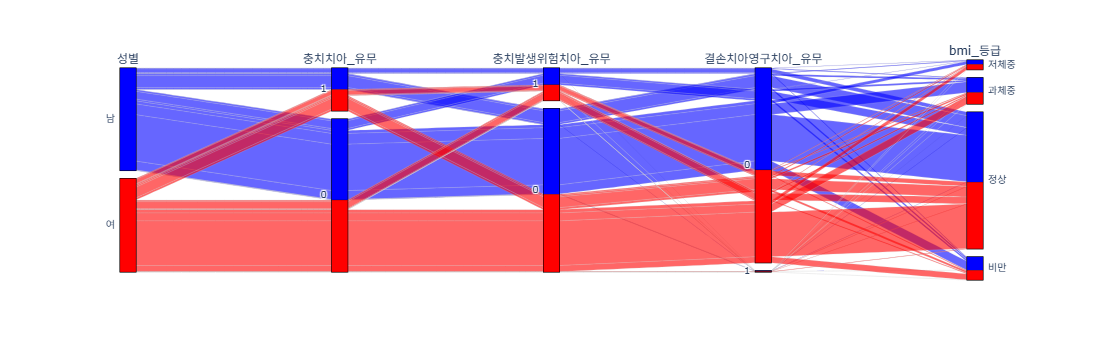

In [39]:
import plotly.express as px

colors = ['blue' if gender == '남' else 'red' for gender in health_drop_ele['성별']]

fig = px.parallel_categories(
    health_drop_ele,
    dimensions=['성별', '충치치아_유무', '충치발생위험치아_유무', '결손치아영구치아_유무','bmi_등급'],
    color=colors
)

fig.show()

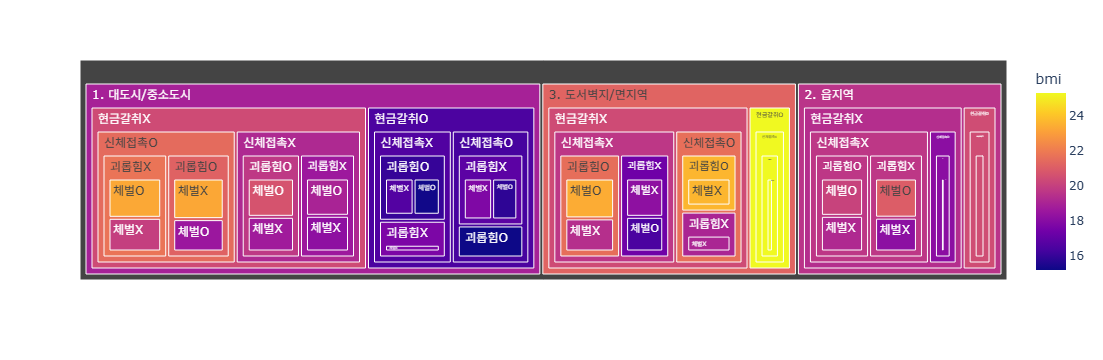

In [40]:
from plotly import express as px
import seaborn as sns

a=health_drop_ele.replace({'현금갈취_초': {1: '현금갈취O', 2: '현금갈취X'},
                         '신체접촉_초': {1: '신체접촉O', 2: '신체접촉X'},
                         '괴롭힘따돌림_초': {1: '괴롭힘O', 2: '괴롭힘X'},
                          '체벌경험_초': {1: '체벌O', 2: '체벌X'}})

bmi_sum=a.groupby(['도시규모','현금갈취_초','신체접촉_초','괴롭힘따돌림_초','체벌경험_초'])["bmi"].mean().reset_index()

fig= px. treemap(bmi_sum, path=['도시규모','현금갈취_초','신체접촉_초','괴롭힘따돌림_초','체벌경험_초'],
                 values='bmi',
                 color="bmi")
fig.show()

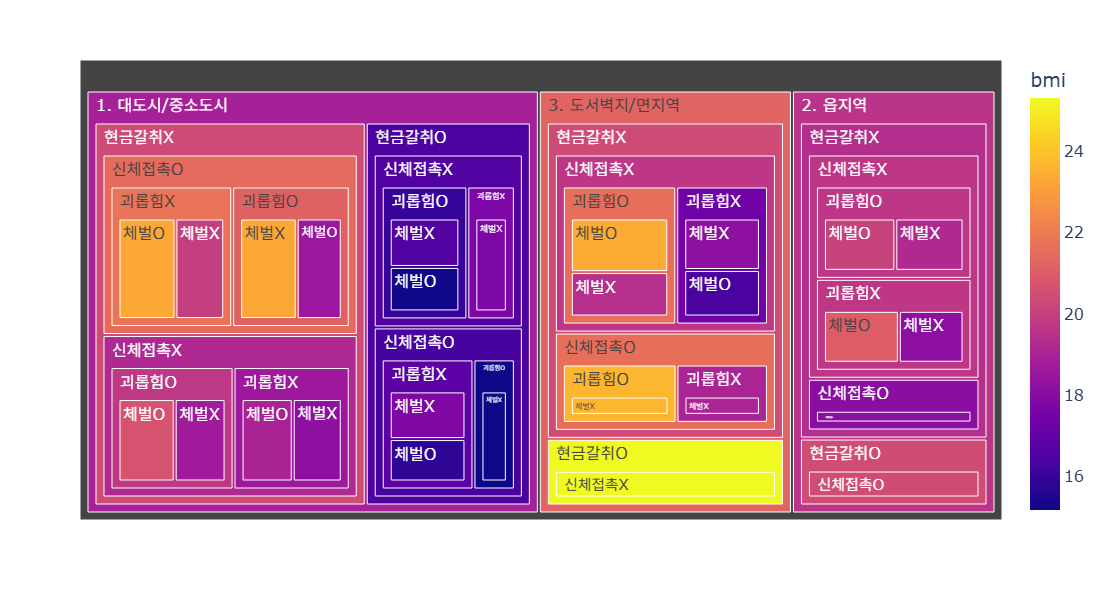

In [41]:
fig.update_layout(
    autosize=False,
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
    font=dict(size=16)  # Set the font size of the text
)

fig.show()

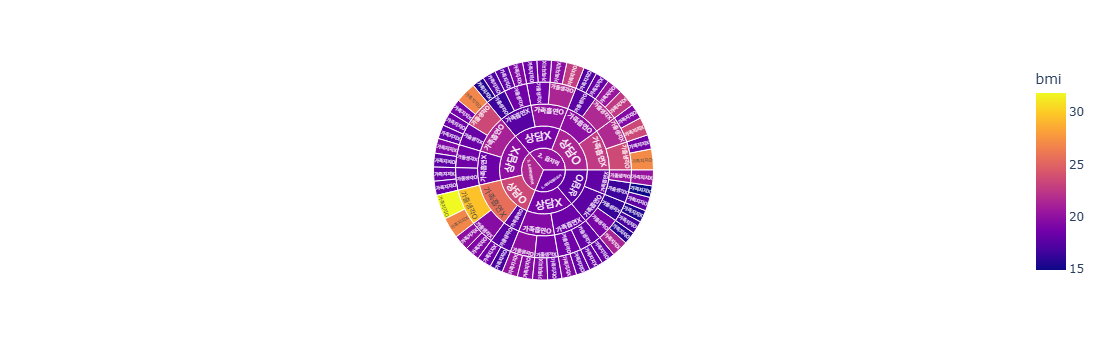

In [42]:
a = health_drop_ele.replace({
    '상담희망_초': {1: '상담O', 2: '상담X'},
    '가족흡연_초': {1: '가족흡연O', 2: '가족흡연X'},
    '가출생각_초': {1: '가출생각O', 2: '가출생각X'},
    '가족지지_초': {1: '가족지지O', 2: '가족지지X'},
    
})

bmi_sum = a.groupby(['도시규모', '상담희망_초', '가족흡연_초', '가출생각_초','가족지지_초'])["bmi"].mean().reset_index()

fig = px.sunburst(bmi_sum, path=['도시규모', '상담희망_초', '가족흡연_초', '가출생각_초','가족지지_초'],
                  values='bmi',
                  color="bmi")
fig.show()

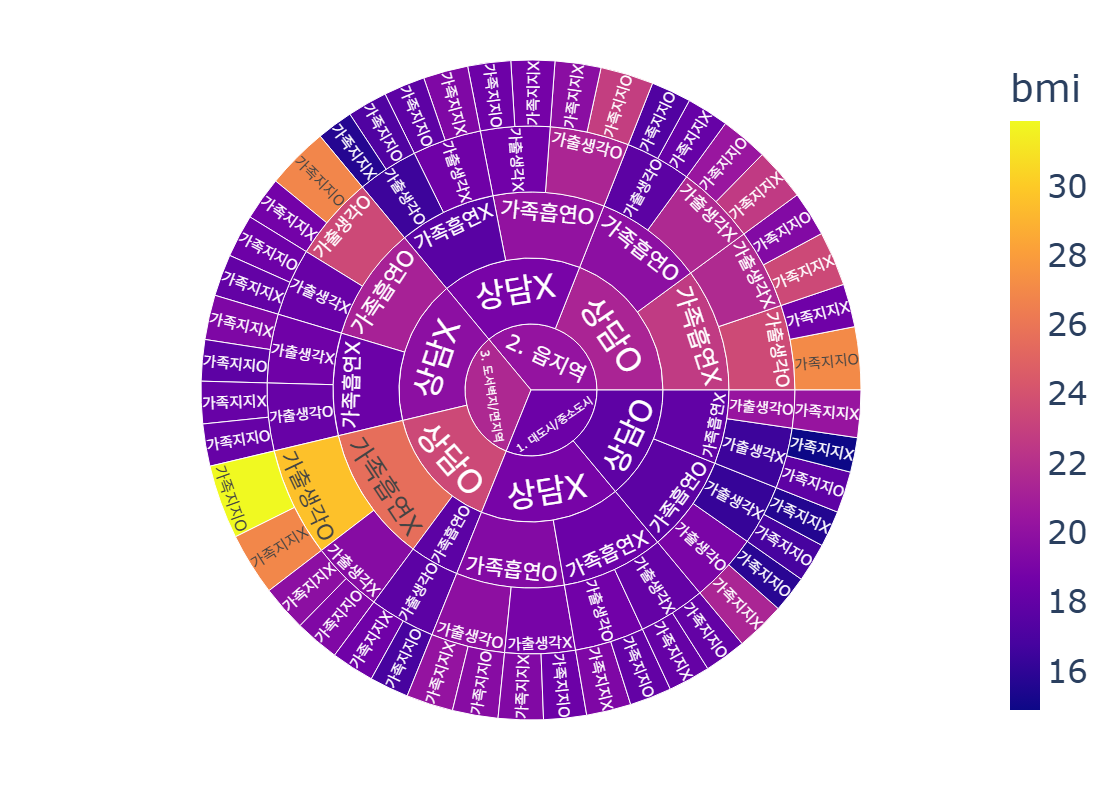

In [43]:
fig = px.sunburst(bmi_sum, path=['도시규모', '상담희망_초', '가족흡연_초', '가출생각_초', '가족지지_초'],
                  values='bmi',
                  color="bmi")

# Update the layout to adjust the size
fig.update_layout(
    autosize=False,
    width=1000,  # Set the width of the plot
    height=800,  # Set the height of the plot
    font=dict(size=32)  # Set the font size of the text
)

fig.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

health_drop_ele['bmi_등급_encoded'] = label_encoder.fit_transform(health_drop_ele['bmi_등급'])
health_drop_ele['시도'] = label_encoder.fit_transform(health_drop_ele['시도'])
health_drop_ele['도시규모'] = label_encoder.fit_transform(health_drop_ele['도시규모'])
health_drop_ele['성별'] = label_encoder.fit_transform(health_drop_ele['성별'])

health_drop_ele[['bmi_등급','bmi_등급_encoded']]

bmi_등급  bmi_등급_encoded
12       저체중               2
15       과체중               0
16        정상               3
17       과체중               0
19       과체중               0
...      ...             ...
25661    과체중               0
25671     정상               3
25672     정상               3
25673     정상               3
25686     정상               3

[4765 rows x 2 columns]

In [46]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 결측치 개수 확인
print(health_drop_ele.isnull().sum())

# 설정을 초기화하여 기본값으로 되돌리기
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

도시규모              0
시도                0
학교급               0
학년                0
성별                0
키                 0
몸무게               0
수축기               0
이완기               0
충치치아_유무           0
충치치아_개수_상         0
충치치아_개수_하         0
충치발생위험치아_유무       0
충치발생위험치아_개수_상     0
충치발생위험치아_개수_하     0
결손치아영구치아_유무       0
결손치아영구치아__개수_상    0
결손치아영구치아__개수_하    0
라면                0
음료수               0
패스트푸드             0
육류                0
우유유제품             0
과일                0
채소(김치제외)          0
아침식사              0
다이어트경험_답변1        0
다이어트경험_답변2        0
다이어트경험_답변3        0
다이어트경험_답변4        0
주3회이상운동_초         0
하루수면량             0
하루tv시청2시간이상_초     0
하루2시간이상게임_초       0
상담희망_초            0
가족흡연_초            0
가족음주_초            0
괴롭힘따돌림_초          0
현금갈취_초            0
신체접촉_초            0
가출생각_초            0
가족지지_초            0
체벌경험_초            0
무기력감_초            0
수업태도교정_초          0
상담요청_초            0
bmi               0
bmi_등급            0
bmi_등급_encoded    0
dtype: int64


In [47]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# features = [['이완기', '수축기']]
# for feature in features:
#     health_drop_ele[feature] = scaler.fit_transform(health_drop_ele[feature])

In [48]:
health_drop_ele.describe()

도시규모           시도           학년           성별            키  \
count  4765.000000  4765.000000  4765.000000  4765.000000  4765.000000   
mean      0.353830     4.458342     2.522980     0.476810   131.678804   
std       0.656851     3.882861     1.499981     0.499514    10.882719   
min       0.000000     0.000000     1.000000     0.000000   102.600000   
25%       0.000000     1.000000     1.000000     0.000000   122.300000   
50%       0.000000     3.000000     4.000000     0.000000   131.100010   
75%       1.000000     7.000000     4.000000     1.000000   140.399990   
max       2.000000    13.000000     4.000000     1.000000   170.100010   

               몸무게          수축기          이완기      충치치아_유무    충치치아_개수_상  ...  \
count  4765.000000  4765.000000  4765.000000  4765.000000  4765.000000  ...   
mean     32.332256    96.711228    58.392235     0.219098     0.280797  ...   
std      10.432739    10.171562     7.139340     0.413678     0.794911  ...   
min      15.200000    60.000000    30.000000     0.000000     0.000000  ...   
25%      24.200001    90.000000    54.000000     0.000000     0.000000  ...   
50%      30.000000    96.000000    60.000000     0.000000     0.000000  ...   
75%      38.299999   102.000000    62.000000     0.000000     0.000000  ...   
max      89.800003   142.000000    90.000000     1.000000     7.000000  ...   

            현금갈취_초       신체접촉_초       가출생각_초       가족지지_초       체벌경험_초  \
count  4765.000000  4765.000000  4765.000000  4765.000000  4765.000000   
mean      1.997062     1.990976     1.971249     1.085414     1.983841   
std       0.054130     0.094576     0.167124     0.279527     0.126102   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     1.000000     2.000000   
50%       2.000000     2.000000     2.000000     1.000000     2.000000   
75%       2.000000     2.000000     2.000000     1.000000     2.000000   
max       2.000000     2.000000     2.000000     2.000000     2.000000   

            무기력감_초     수업태도교정_초       상담요청_초          bmi  bmi_등급_encoded  
count  4765.000000  4765.000000  4765.000000  4765.000000     4765.000000  
mean      1.984890     1.968940     1.980273    18.215940        2.311647  
std       0.122004     0.173498     0.139076     3.529572        1.120959  
min       1.000000     1.000000     1.000000    11.379153        0.000000  
25%       2.000000     2.000000     2.000000    15.605959        1.000000  
50%       2.000000     2.000000     2.000000    17.400055        3.000000  
75%       2.000000     2.000000     2.000000    20.191680        3.000000  
max       2.000000     2.000000     2.000000    35.010578        3.000000  

[8 rows x 47 columns]

In [49]:
health_drop_ele=health_drop_ele.reset_index(drop=True)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 분류 분석

In [51]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.3, 
	random_state=4)

In [52]:
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
# X_train, y_train = oversampler.fit_resample(X_train, y_train)

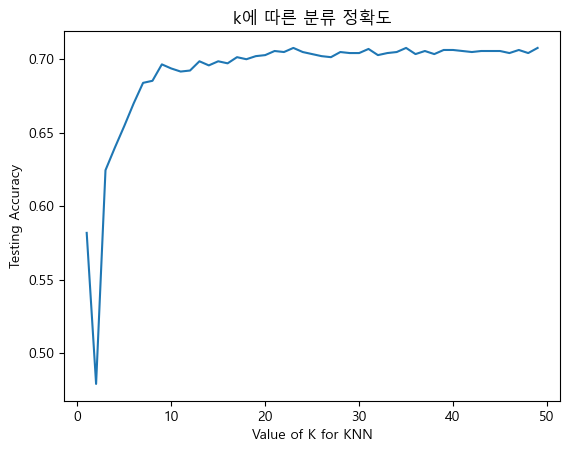

[[  2  12   0 180]
 [  2  14   0 162]
 [  0   0   0  55]
 [  0   7   0 996]]
n_estimators : 23
KNN 분류 정확도 Max : 0.7076923076923077


In [53]:
k_range = range(1, 50)

accuracy_scores = []
max_val=0

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=k

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("k에 따른 분류 정확도")
plt.show()



print(confusion_matrix(y_test, guesses))

print("n_estimators :",n_estimators)
print("KNN 분류 정확도 Max :", max(accuracy_scores))

In [54]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

#print(guesses)

# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print("NA 분류 정확도:" ,metrics.accuracy_score(y_test, guesses))

[[ 33  26 135   0]
 [ 44  44  89   1]
 [  2   2  51   0]
 [ 72  55 873   3]]
NA 분류 정확도: 0.09160839160839161


In [55]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print("SVC 분류 정확도 :",metrics.accuracy_score(y_test, guesses))

[3 3 3 ... 3 3 3]
[[  3  16   0 175]
 [  2  44   0 132]
 [  0   0   0  55]
 [  3   9   0 991]]
SVC 분류 정확도 : 0.7258741258741259


In [56]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
classifier = DecisionTreeClassifier(random_state=0)

#Train the model using the training sets
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("DecisionTree 분류 정확도:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 31  43   9 111]
 [ 47  52   3  76]
 [  8   2   6  39]
 [126  76  87 714]]
DecisionTree 분류 정확도: 0.5615384615384615


Confusion Matrix:  [[  6  22   0 166]
 [ 14  36   0 128]
 [  1   0   0  54]
 [ 10  15   0 978]]
Randomforest 분류 정확도 : 0.7153846153846154
n_estimators : 135
Accuracy: 0.7132867132867133


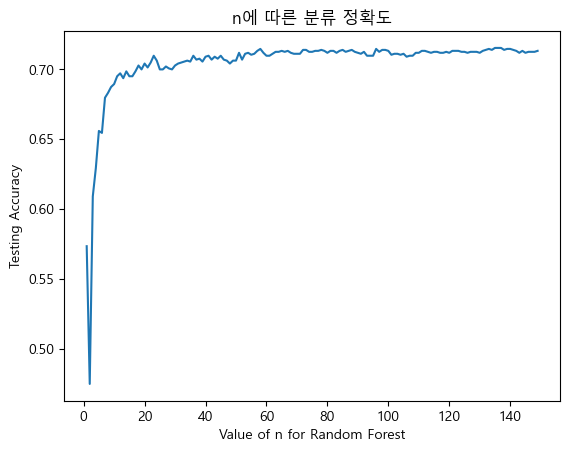

In [57]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

n_range = range(1, 150)
accuracy_scores = []
max_val=0
#Create a Gaussian Classifier
for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=n

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))
print("Randomforest 분류 정확도 :",max_val)
print("n_estimators :",n_estimators)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.title("n에 따른 분류 정확도") 
plt.show()

Confusion Matrix:  [[ 33  31   2 128]
 [ 26  61   1  90]
 [  1   2   1  51]
 [ 37  29  21 916]]
ada 분류 정확도 : 0.7223776223776224
n_estimators : 21


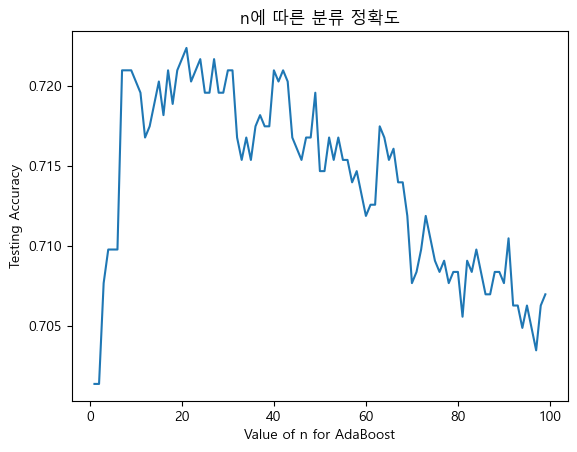

In [58]:
from sklearn.ensemble import AdaBoostClassifier

n_range = range(1, 100)
accuracy_scores = []
max_val=0
for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=n

print("Confusion Matrix: ", confusion_matrix(y_test, guesses))
print("ada 분류 정확도 :",max_val)
print("n_estimators :",n_estimators)
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for AdaBoost')
plt.ylabel('Testing Accuracy')
plt.title("n에 따른 분류 정확도")
plt.show()

In [59]:
# health_drop_ele.describe()

# 불필요한 열 제거

수축기              -0.257355
이완기              -0.190172
다이어트경험_답변1        0.336779
다이어트경험_답변2       -0.254063
다이어트경험_답변4       -0.297066
bmi_등급_encoded    1.000000
Name: bmi_등급_encoded, dtype: float64


<AxesSubplot: >

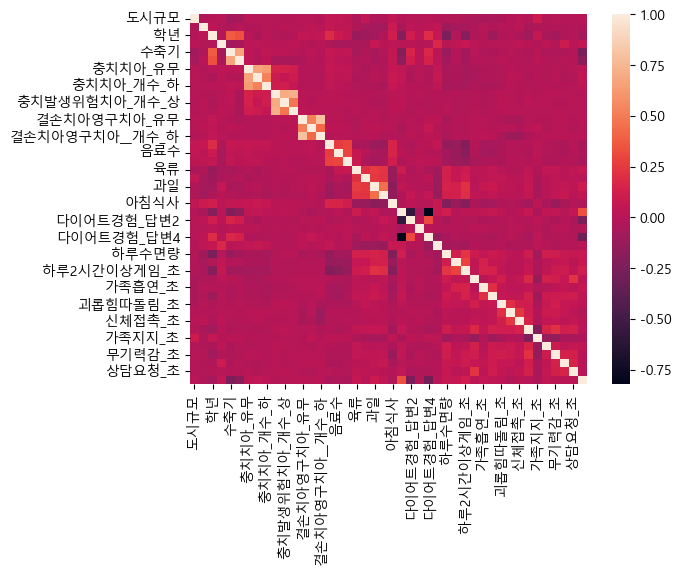

In [60]:
b=health_drop_ele.drop(columns=["키","몸무게","bmi"])
a=b.corr()["bmi_등급_encoded"]
print(a[(a>0.15) | (a<-0.15)])
sns.heatmap(data=b.corr())

In [61]:
training_points_2 = health_drop_ele[['수축기','이완기','다이어트경험_답변1','다이어트경험_답변2','다이어트경험_답변4']]
training_labels_2 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_2, 
	training_labels_2, 
	test_size=0.3, 
	random_state=4)

In [62]:
training_points_2.describe()

수축기          이완기   다이어트경험_답변1   다이어트경험_답변2   다이어트경험_답변4
count  4765.000000  4765.000000  4765.000000  4765.000000  4765.000000
mean     96.711228    58.392235     0.706191     0.122980     0.228122
std      10.171562     7.139340     0.455553     0.328449     0.419666
min      60.000000    30.000000     0.000000     0.000000     0.000000
25%      90.000000    54.000000     0.000000     0.000000     0.000000
50%      96.000000    60.000000     1.000000     0.000000     0.000000
75%     102.000000    62.000000     1.000000     0.000000     0.000000
max     142.000000    90.000000     1.000000     1.000000     1.000000

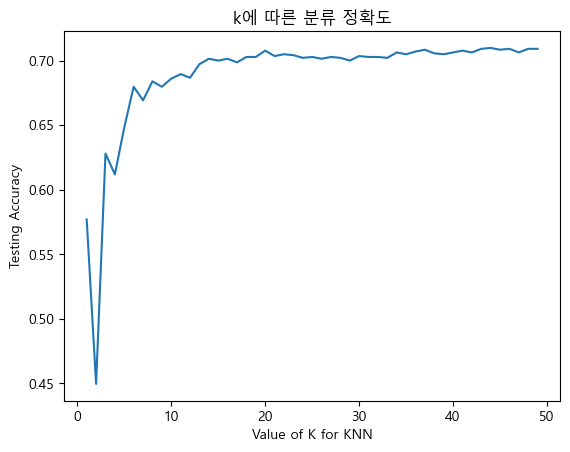

[[  0   8   0 186]
 [  1  16   0 161]
 [  0   0   0  55]
 [  0   5   0 998]]
n_estimators : 44
KNN 분류 정확도 Max : 0.7097902097902098


In [63]:
k_range = range(1, 50)

accuracy_scores = []
max_val=0
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=k

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("k에 따른 분류 정확도")
plt.show()
print(confusion_matrix(y_test, guesses))

print("n_estimators :",n_estimators)
print("KNN 분류 정확도 Max :", max(accuracy_scores))

In [64]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

#print(guesses)

# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print("NA 분류 정확도:",metrics.accuracy_score(y_test, guesses))

[[ 36  55   3 100]
 [ 27  90   0  61]
 [  1   1   0  53]
 [ 65  85  21 832]]
NA 분류 정확도: 0.66993006993007


In [65]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

# print(guesses)

# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print("SVC 분류 정확도 :",metrics.accuracy_score(y_test, guesses))

[[   0    0    0  194]
 [   0    0    0  178]
 [   0    0    0   55]
 [   0    0    0 1003]]
SVC 분류 정확도 : 0.7013986013986014


In [66]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
classifier = DecisionTreeClassifier(random_state=0)

#Train the model using the training sets
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("Decision Tree 분류 정확도:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 28  37   4 125]
 [ 47  43   1  87]
 [  4   2   0  49]
 [ 80  52  29 842]]
Decision Tree 분류 정확도: 0.6384615384615384


Confusion Matrix:  [[ 27  30   1 136]
 [ 32  41   1 104]
 [  2   1   0  52]
 [ 47  48  19 889]]
n_estimators : 60
랜덤포레스트 분류 정확도: 0.6692307692307692


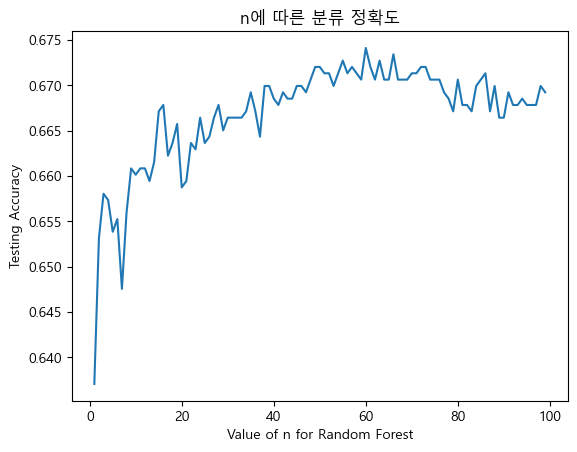

In [67]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

n_range = range(1, 100)
accuracy_scores = []
max_val=0
#Create a Gaussian Classifier
for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=n

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("n_estimators :",n_estimators)
print("랜덤포레스트 분류 정확도:", accuracy_score(y_test, guesses))
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.title("n에 따른 분류 정확도")
plt.show()

Confusion Matrix:  [[ 10  19   1 164]
 [ 17  27   0 134]
 [  0   1   0  54]
 [  9  17   0 977]]
ada 분류 정확도 : 0.720979020979021
n_estimators : 5


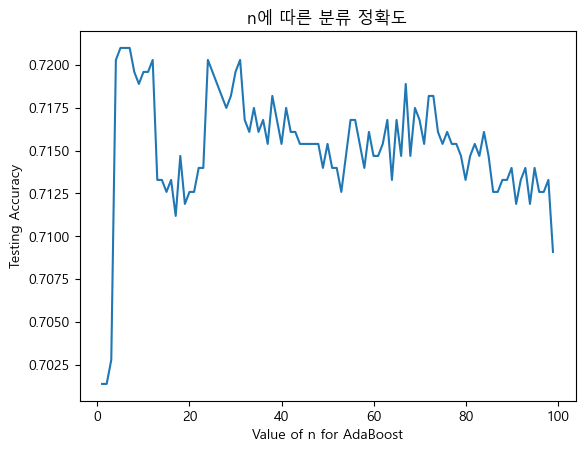

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

n_range = range(1, 100)
accuracy_scores = []
max_val=0
for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=n

import matplotlib.pyplot as plt
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))
print("ada 분류 정확도 :",max_val)
print("n_estimators :",n_estimators)
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for AdaBoost')
plt.ylabel('Testing Accuracy')
plt.title("n에 따른 분류 정확도")
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
	training_points_2, 
	training_labels_2, 
	test_size=0.3, 
	random_state=4)

In [70]:
# import imblearn
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [71]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score

# n_range = range(1, 100)
# accuracy_scores = []
# max_val=0
# for n in n_range:
#     classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
#     classifier.fit(X_resampled, y_resampled)
#     guesses = classifier.predict(X_test)
#     a=accuracy_score(y_test, guesses)
#     accuracy_scores.append(a)
#     if max_val < a:
#         max_val = a
#         n_estimators=n

# import matplotlib.pyplot as plt
# print("Confusion Matrix: ", confusion_matrix(y_test, guesses))
# print("ada 분류 정확도 :",max_val)
# print("n_estimators :",n_estimators)
# plt.plot(n_range, accuracy_scores)
# plt.xlabel('Value of n for AdaBoost')
# plt.ylabel('Testing Accuracy')
# plt.title("n에 따른 분류 정확도")
# plt.show()

In [ ]:
# #Import Random Forest
# from sklearn.ensemble import RandomForestClassifier

# n_range = range(1, 100)
# accuracy_scores = []
# max_val=0
# #Create a Gaussian Classifier
# for n in n_range:
#     classifier = RandomForestClassifier(random_state=0, n_estimators=n)
#     classifier.fit(X_train, y_train)
#     guesses = classifier.predict(X_test)
#     a=accuracy_score(y_test, guesses)
#     accuracy_scores.append(a)
#     if max_val < a:
#         max_val = a
#         n_estimators=n

# #Train the model using the training sets y_pred=clf.predict(X_test)
# classifier.fit(X_train,y_train)

# guesses = classifier.predict(X_test)

# # Confusion matrix
# print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# # Model Accuracy, how often is the classifier correct?
# print("n_estimators :",n_estimators)
# print("랜덤포레스트 분류 정확도:", accuracy_score(y_test, guesses))
# plt.plot(n_range, accuracy_scores)
# plt.xlabel('Value of n for Random Forest')
# plt.ylabel('Testing Accuracy')
# plt.title("n에 따른 분류 정확도")
# plt.show()

In [ ]:
# from imblearn.over_sampling import SMOTE

# # 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
# smote = SMOTE(random_state=11)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# 스택킹

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('svm', SVC(kernel = 'linear')),
    ('knn', KNeighborsClassifier(n_neighbors = 44)),
    
]

# Create the stacking classifier with a logistic regression as the meta-model
classifier = StackingClassifier(estimators=base_models, final_estimator=DecisionTreeClassifier())

# Train the stacking classifier
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)
# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("SVM, KNN 스태킹(DecisionTree) 분류 정확도:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 37  22  13 122]
 [ 33  40   7  98]
 [  4   0   8  43]
 [161  62  91 689]]
SVM, KNN 스태킹(DecisionTree) 분류 정확도: 0.5412587412587413


In [74]:
base_models = [
    ('svm', SVC(kernel = 'linear')),
    ('knn', KNeighborsClassifier(n_neighbors = 44)),
    
]

from sklearn.linear_model import LogisticRegression

classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking classifier
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("SVM, KNN 스태킹(Logistic) 분류 정확도:", accuracy_score(y_test, guesses))
from sklearn.metrics import classification_report
print(classification_report(y_test,guesses))

Confusion Matrix:  [[  0  24   0 170]
 [  0  34   0 144]
 [  0   1   0  54]
 [  0  17   0 986]]
SVM, KNN 스태킹(Logistic) 분류 정확도: 0.7132867132867133
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       194
           1       0.45      0.19      0.27       178
           2       0.00      0.00      0.00        55
           3       0.73      0.98      0.84      1003

    accuracy                           0.71      1430
   macro avg       0.29      0.29      0.28      1430
weighted avg       0.57      0.71      0.62      1430



In [75]:
base_models = [
    ('ada', AdaBoostClassifier(random_state=0, n_estimators=21)),
    ('svm', SVC(kernel = 'linear')),
    
]

from sklearn.linear_model import LogisticRegression

classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking classifier
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("ADA, SVM 스태킹(Logistic) 분류 정확도:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[  0  20   0 174]
 [  0  40   0 138]
 [  0   1   0  54]
 [  0  20   0 983]]
ADA, SVM 스태킹(Logistic) 분류 정확도: 0.7153846153846154


In [76]:
base_models = [
    ('ada', AdaBoostClassifier(random_state=0, n_estimators=21)),
    ('knn', KNeighborsClassifier(n_neighbors = 44)),
    ('svm', SVC(kernel = 'linear'))
]

from sklearn.linear_model import LogisticRegression

classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking classifier
classifier.fit(X_train, y_train)

guesses = classifier.predict(X_test)

#Import scikit-learn metrics module for checking confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))

# Model Accuracy, how often is the classifier correct?
print("ADA, KNN, SVM 스태킹(Logistic) 분류 정확도:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[  0  22   0 172]
 [  0  34   0 144]
 [  0   1   0  54]
 [  0  17   0 986]]
ADA, KNN, SVM 스태킹(Logistic) 분류 정확도: 0.7132867132867133


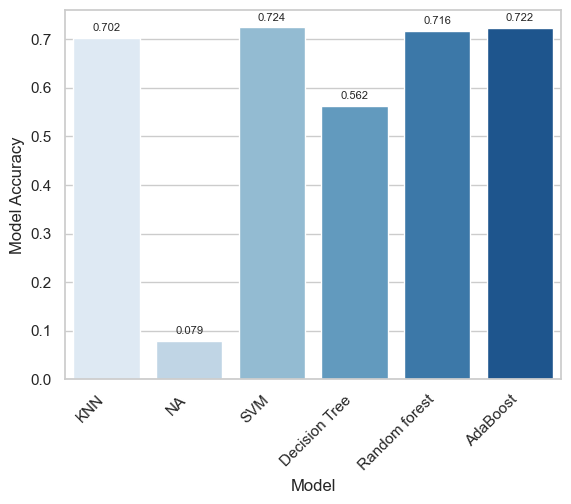

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 샘플 데이터 생성
categories = ['KNN', 'NA', 'SVM', 'Decision Tree', 'Random forest', 'AdaBoost']
values = [0.7020979020979021, 0.07902097902097902, 0.72377622377622370, 0.5622377622377622,
          0.7160839160839161, 0.7223776223776224]

# Seaborn 스타일 설정 (선택사항)
sns.set(style="whitegrid")

# 막대그래프 그리기
ax = sns.barplot(x=categories, y=values, palette="Blues")

# x축 레이블의 각도 조절
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 막대 위에 수치 표시
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

# 그래프에 제목 추가
plt.title('')

# x축, y축에 레이블 추가 (선택사항)
plt.xlabel('Model')
plt.ylabel('Model Accuracy')

# 그래프 표시
plt.show()

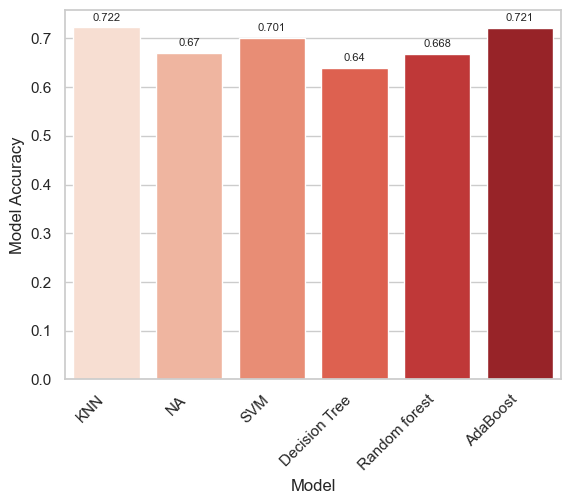

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 샘플 데이터 생성
categories = ['KNN', 'NA', 'SVM', 'Decision Tree', 'Random forest', 'AdaBoost']
values = [ 0.7223776223776224, 0.66993006993007, 0.7013986013986014,0.6398601398601399,
          0.6678321678321678, 0.720979020979021]

# Seaborn 스타일 설정 (선택사항)
sns.set(style="whitegrid")

# 막대그래프 그리기
ax = sns.barplot(x=categories, y=values, palette="Reds")

# x축 레이블의 각도 조절
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 막대 위에 수치 표시
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

# 그래프에 제목 추가
plt.title('')

# x축, y축에 레이블 추가 (선택사항)
plt.xlabel('Model')
plt.ylabel('Model Accuracy')

# 그래프 표시
plt.show()

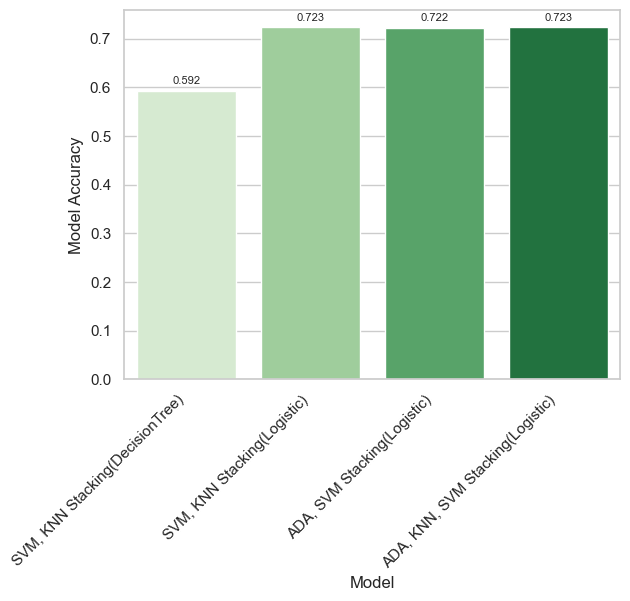

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 샘플 데이터 생성
categories = ['SVM, KNN Stacking(DecisionTree)', 'SVM, KNN Stacking(Logistic)', 'ADA, SVM Stacking(Logistic)',
              'ADA, KNN, SVM Stacking(Logistic)']
values = [ 0.5923076923076923,  0.7230769230769231, 0.7223776223776224,0.7230769230769231]

# Seaborn 스타일 설정 (선택사항)
sns.set(style="whitegrid")

# 막대그래프 그리기
ax = sns.barplot(x=categories, y=values, palette="Greens")

# x축 레이블의 각도 조절
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 막대 위에 수치 표시
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

# 그래프에 제목 추가
plt.title('')

# x축, y축에 레이블 추가 (선택사항)
plt.xlabel('Model')
plt.ylabel('Model Accuracy')

# 그래프 표시
plt.show()

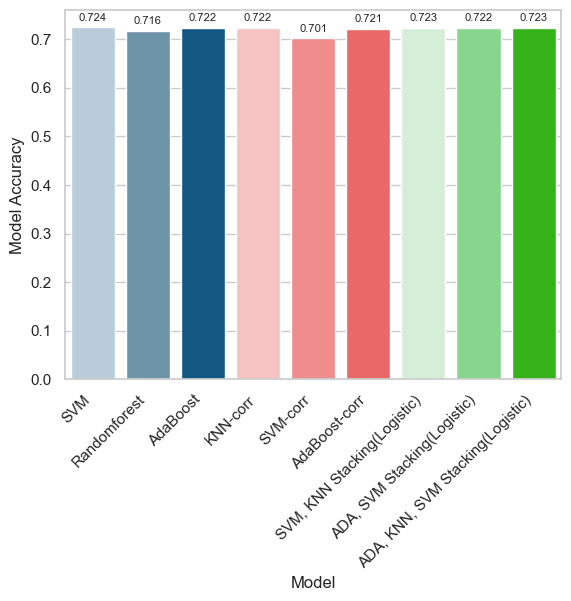

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 샘플 데이터 생성
categories = ['SVM', 'Randomforest', 'AdaBoost', 
              'KNN-corr', 'SVM-corr', 'AdaBoost-corr',
              'SVM, KNN Stacking(Logistic)', 'ADA, SVM Stacking(Logistic)', 'ADA, KNN, SVM Stacking(Logistic)']
values = [0.7237762237762237,  0.7160839160839161, 0.7223776223776224,
          0.7223776223776224, 0.7013986013986014, 0.720979020979021,
          0.7230769230769231,  0.7223776223776224, 0.7230769230769231]

# Seaborn 스타일 설정 (선택사항)
sns.set(style="whitegrid")

# 색상 설정 (RGB values normalized to [0, 1])
colors = [(179/255, 205/255, 224/255), (100/255, 151/255, 177/255), (0/255, 91/255, 150/255),
          (255/255, 186/255, 186/255), (255/255, 123/255, 123/255), (255/255, 82/255, 82/255), 
          (210/255, 242/255, 212/255), (123/255, 227/255, 130/255), (38/255, 204/255, 0/255)]

# 막대그래프 그리기
ax = sns.barplot(x=categories, y=values, palette=colors)

# x축 레이블의 각도 조절
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 막대 위에 수치 표시
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

# 그래프에 제목 추가
plt.title('')

# x축, y축에 레이블 추가 (선택사항)
plt.xlabel('Model')
plt.ylabel('Model Accuracy')

# 그래프 표시
plt.show()

# 성능향상 - target 비율 불균형 조정 (SMOTE, OVERsampling)

## OVERSAMPLING

In [81]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.3, 
	random_state=4)

from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [82]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

n_range = range(100, 150)
accuracy_scores = []
max_val=0
#Create a Gaussian Classifier
for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=n

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))
print("Randomforest 분류 정확도 :",max_val)
print("n_estimators :",n_estimators)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 18  35   2 139]
 [ 32  45   1 100]
 [  2   0   0  53]
 [ 31  28   3 941]]
Randomforest 분류 정확도 : 0.7041958041958042
n_estimators : 126
Accuracy: 0.7020979020979021


In [83]:
k_range = range(1, 50)

accuracy_scores = []
max_val=0

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=k

print(confusion_matrix(y_test, guesses))

print("n_estimators :",n_estimators)
print("KNN 분류 정확도 Max :", max(accuracy_scores))

[[ 53  57  43  41]
 [ 58  62  38  20]
 [ 10   4  21  20]
 [256 152 328 267]]
n_estimators : 1
KNN 분류 정확도 Max : 0.5818181818181818


In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

n_range = range(1, 50)
accuracy_scores = []
max_val=0
for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=n

import matplotlib.pyplot as plt
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))
print("ada 분류 정확도 :",max_val)
print("n_estimators :",n_estimators)

Confusion Matrix:  [[ 67  59  31  37]
 [ 60  88  12  18]
 [  3   5  30  17]
 [193 118 383 309]]
ada 분류 정확도 : 0.37902097902097903
n_estimators : 2


## SMOTE

In [85]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.3, 
	random_state=4)

from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [86]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

n_range = range(1, 15)
accuracy_scores = []
max_val=0
#Create a Gaussian Classifier
for n in n_range:
    classifier = RandomForestClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=n

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

guesses = classifier.predict(X_test)

# Confusion matrix
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))
print("Randomforest 분류 정확도 :",max_val)
print("n_estimators :",n_estimators)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, guesses))

Confusion Matrix:  [[ 34  52   7 101]
 [ 47  55   3  73]
 [  6   1   5  43]
 [101  43  77 782]]
Randomforest 분류 정확도 : 0.6125874125874126
n_estimators : 14
Accuracy: 0.6125874125874126


In [87]:
k_range = range(1, 50)

accuracy_scores = []
max_val=0

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=k

print(confusion_matrix(y_test, guesses))

print("n_estimators :",n_estimators)
print("KNN 분류 정확도 Max :", max(accuracy_scores))

[[ 66  57  42  29]
 [ 64  75  25  14]
 [ 10   9  23  13]
 [265 161 371 206]]
n_estimators : 1
KNN 분류 정확도 Max : 0.4986013986013986


In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

n_range = range(1, 50)
accuracy_scores = []
max_val=0
for n in n_range:
    classifier = AdaBoostClassifier(random_state=0, n_estimators=n)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    a=accuracy_score(y_test, guesses)
    accuracy_scores.append(a)
    if max_val < a:
        max_val = a
        n_estimators=n

import matplotlib.pyplot as plt
print("Confusion Matrix: ", confusion_matrix(y_test, guesses))
print("ada 분류 정확도 :",max_val)
print("n_estimators :",n_estimators)

Confusion Matrix:  [[ 35  39  21  99]
 [ 33  70   7  68]
 [  2   3  15  35]
 [105  55 229 614]]
ada 분류 정확도 : 0.5251748251748252
n_estimators : 33


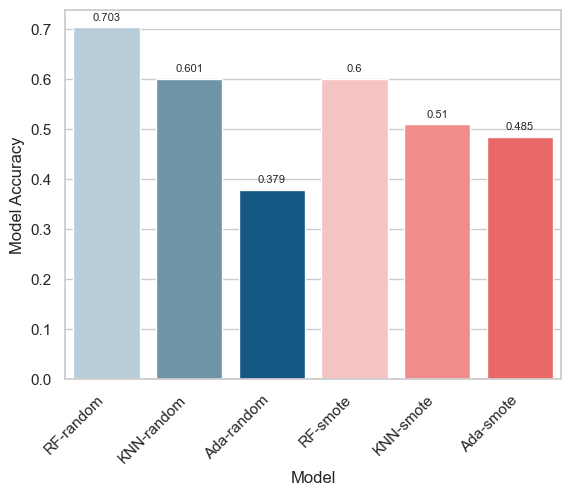

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 샘플 데이터 생성
categories = ['RF-random', 'KNN-random', 'Ada-random', 
              'RF-smote', 'KNN-smote', 'Ada-smote'
              ]
values = [0.7034965034965035,  0.6013986013986014, 0.37902097902097903,
          0.6,  0.5097902097902098, 0.4853146853146853]

# Seaborn 스타일 설정 (선택사항)
sns.set(style="whitegrid")

# 색상 설정 (RGB values normalized to [0, 1])
colors = [(179/255, 205/255, 224/255), (100/255, 151/255, 177/255), (0/255, 91/255, 150/255),
          (255/255, 186/255, 186/255), (255/255, 123/255, 123/255), (255/255, 82/255, 82/255) 
          ]

# 막대그래프 그리기
ax = sns.barplot(x=categories, y=values, palette=colors)

# x축 레이블의 각도 조절
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 막대 위에 수치 표시
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

# 그래프에 제목 추가
plt.title('')

# x축, y축에 레이블 추가 (선택사항)
plt.xlabel('Model')
plt.ylabel('Model Accuracy')

# 그래프 표시
plt.show()

# 성능향상 - 다양한 모델 적용 및 하이퍼파라미터 조정

In [90]:
health_drop_ele['수축기*이완기']=health_drop_ele["수축기"]*health_drop_ele['이완기']
health_drop_ele['수축기2']=health_drop_ele['수축기']*health_drop_ele['수축기']
health_drop_ele['이완기2']=health_drop_ele['이완기']*health_drop_ele['이완기']
# health_drop_ele['수축기/이완기']=health_drop_ele["수축기"]/health_drop_ele['이완기']
health_drop_ele['다이어트경험']=health_drop_ele['다이어트경험_답변1']+health_drop_ele['다이어트경험_답변2']+health_drop_ele['다이어트경험_답변3']+health_drop_ele['다이어트경험_답변4']
# health_drop_ele['가족문제']=health_drop_ele['가족흡연_초']+health_drop_ele['가족음주_초']
health_drop_ele['괴롭힘']=health_drop_ele['괴롭힘따돌림_초']+health_drop_ele['현금갈취_초']+health_drop_ele['신체접촉_초']
# health_drop_ele['이상치아유무']=health_drop_ele['충치발생위험치아_유무']+health_drop_ele['결손치아영구치아_유무']+health_drop_ele['충치치아_유무']
health_drop_ele['나쁜식단']=health_drop_ele['라면']+health_drop_ele['음료수']+health_drop_ele['패스트푸드']
health_drop_ele['좋은식단']=health_drop_ele['채소(김치제외)']+health_drop_ele['과일']

## XGB 피쳐엔지니어링 전

In [91]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급','수축기*이완기',
                                                 '수축기2','이완기2','다이어트경험','괴롭힘','나쁜식단','좋은식단'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [92]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Create XGBClassifier
classifier = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7135362014690452


### XGB 피쳐 엔지니어링 후

In [93]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급','괴롭힘','나쁜식단','좋은식단'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.3, 
	random_state=4)

In [94]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Create XGBClassifier
classifier = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',random_state=42)

# Fit the model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6944055944055944


## OPTUNA - 하이퍼파라미터 최적화

In [95]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급','수축기*이완기',
                                                 '수축기2','이완기2','다이어트경험','괴롭힘','나쁜식단','좋은식단'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [96]:
# import optuna

# def objective(trial):
#     # Define hyperparameters to be optimized
#     params = {
#         'objective': 'multi:softprob',
#         'eval_metric': 'mlogloss',
#         'verbosity' : 0,
#         'random_state' : 42,
#         'lambda' : trial.suggest_float('lambda', 1e-8, 1.0, log=True),
#         'alpha' : trial.suggest_float('alpha', 1e-8, 1.0, log=True),
#         'learning_rate' : trial.suggest_float('learning_rate', 0.001, 0.1),
#         'max_depth' : trial.suggest_int('max_depth', 1, 10),
#         'subsample' : trial.suggest_float('subsample', 0.2, 1.0),
#         'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.05, 1.0),
#         'min_child_weight' : trial.suggest_int('min_child_weight', 5,20)
        
#     }

#     # Create XGBClassifier with optimized hyperparameters
#     classifier = XGBClassifier(**params)

#     # Fit the model
#     classifier.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = classifier.predict(X_test)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     return accuracy

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)  # You can adjust the number of trials as needed

# # Get the best hyperparameters
# best_params = study.best_params
# print(f"Best Hyperparameters: {best_params}")

# # Create XGBClassifier with the best hyperparameters
# best_classifier = XGBClassifier(**best_params)

# # Fit the model with the entire training set
# best_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_classifier.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Optimized Accuracy: {accuracy}')

Best Hyperparameters: {'lambda': 9.12458979540811e-07, 'alpha': 0.23700497070508808, 'learning_rate': 0.0509900980365593, 'max_depth': 9, 'subsample': 0.20162136386749574, 'colsample_bytree': 0.92002976383093, 'min_child_weight': 6}


In [97]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create XGBClassifier
params ={
    'objective' : 'multi:softprob',
    'eval_metric' : 'mlogloss',
    'random_state' : 42,
    'lambda': 9.12458979540811e-07,
    'alpha': 0.23700497070508808,
    'learning_rate': 0.0509900980365593, 
    'max_depth': 9,
    'subsample': 0.20162136386749574, 
    'colsample_bytree': 0.92002976383093, 
    'min_child_weight': 6
    
}
classifier = XGBClassifier(**params)

# Fit the model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7355718782791185


## LIGHTGBM - 피쳐엔지니어링 전

In [98]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급','수축기*이완기',
                                                 '수축기2','이완기2','다이어트경험','괴롭힘','나쁜식단','좋은식단'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [99]:
import lightgbm as lgb

categories=['도시규모', '시도',  '학년', '성별', '충치치아_유무',
        '충치발생위험치아_유무', 
        '결손치아영구치아_유무',
       '라면', '음료수', '패스트푸드', '육류', '우유유제품', '과일', '채소(김치제외)', '아침식사',
       '다이어트경험_답변1', '다이어트경험_답변2', '다이어트경험_답변3', '다이어트경험_답변4', '주3회이상운동_초',
       '하루수면량', '하루tv시청2시간이상_초', '하루2시간이상게임_초', '상담희망_초', '가족흡연_초', '가족음주_초',
       '괴롭힘따돌림_초', '현금갈취_초', '신체접촉_초', '가출생각_초', '가족지지_초', '체벌경험_초', '무기력감_초',
       '수업태도교정_초', '상담요청_초',]

lgbm_params = {
    "objective" : "multiclass",
    "num_class" : 4,
    'max_bin' : 331,
    'num_leaves' : 20,
    'min_data_in_leaf' : 57,
    "random_seed" : 42
}

In [100]:
lgb_train=lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval=lgb.Dataset(X_test, y_test, categorical_feature=categories, reference=lgb_train)

In [101]:
model_lgb=lgb.train(lgbm_params,
                    lgb_train,
                    valid_sets=lgb_eval,
                    num_boost_round=100,
                    early_stopping_rounds=20,
                    verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 3812, number of used features: 37
[LightGBM] [Info] Start training from score -1.994005
[LightGBM] [Info] Start training from score -2.150085
[LightGBM] [Info] Start training from score -2.947592
[LightGBM] [Info] Start training from score -0.363972
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.787049
[20]	valid_0's multi_logloss: 0.779019
[30]	valid_0's multi_logloss: 0.779624
[40]	valid_0's multi_logloss: 0.787545
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.777139


In [102]:
y_pred = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)
y_pred_class = np.argmax(y_pred, axis=1)  # 다중 클래스 예측에서 클래스를 선택

accuracy = accuracy_score(y_test, y_pred_class)
accuracy

0.7345225603357818

### Lightgbm - 피쳐엔지니어링 후

In [103]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급','괴롭힘','나쁜식단','좋은식단'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [104]:
import lightgbm as lgb

categories=['도시규모', '시도',  '학년', '성별', '충치치아_유무',
        '충치발생위험치아_유무', 
        '결손치아영구치아_유무',
       '라면', '음료수', '패스트푸드', '육류', '우유유제품', '과일', '채소(김치제외)', '아침식사',
       '다이어트경험_답변1', '다이어트경험_답변2', '다이어트경험_답변3', '다이어트경험_답변4', '주3회이상운동_초',
       '하루수면량', '하루tv시청2시간이상_초', '하루2시간이상게임_초', '상담희망_초', '가족흡연_초', '가족음주_초',
       '괴롭힘따돌림_초', '현금갈취_초', '신체접촉_초', '가출생각_초', '가족지지_초', '체벌경험_초', '무기력감_초',
       '수업태도교정_초', '상담요청_초',]

lgbm_params = {
    "objective" : "multiclass",
    "num_class" : 4,
    'max_bin' : 331,
    'num_leaves' : 20,
    'min_data_in_leaf' : 57,
    "random_seed" : 42
}

In [105]:
lgb_train=lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval=lgb.Dataset(X_test, y_test, categorical_feature=categories, reference=lgb_train)

model_lgb=lgb.train(lgbm_params,
                    lgb_train,
                    valid_sets=lgb_eval,
                    num_boost_round=100,
                    early_stopping_rounds=20,
                    verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 3812, number of used features: 41
[LightGBM] [Info] Start training from score -1.994005
[LightGBM] [Info] Start training from score -2.150085
[LightGBM] [Info] Start training from score -2.947592
[LightGBM] [Info] Start training from score -0.363972
Training until validation scores don't improve for 20 rounds
[10]	valid_0's multi_logloss: 0.781282
[20]	valid_0's multi_logloss: 0.772642
[30]	valid_0's multi_logloss: 0.775059
[40]	valid_0's multi_logloss: 0.778383
Early stopping, best iteration is:
[23]	valid_0's multi_logloss: 0.770736


In [106]:
y_pred = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)
y_pred_class = np.argmax(y_pred, axis=1)  # 다중 클래스 예측에서 클래스를 선택

accuracy = accuracy_score(y_test, y_pred_class)
accuracy

0.7408184679958028

## OPTUNA - 하이퍼파라미터

In [107]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급','괴롭힘','나쁜식단','좋은식단'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [108]:
import optuna

In [109]:

# def objective(trial):
#     params = {
#         'random_state': trial.suggest_int('random_state', 0, 100),
#         'objective': 'multiclass',
#         'num_class': len(set(y_train)),
#         'boosting_type': 'gbdt',
#         'verbosity' : -1,
#         'metric': 'multi_logloss',
#         'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 5, 30),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
#         'subsample' : trial.suggest_loguniform('subsample', 0.4, 1.0),
#         'lambda_l1' : trial.suggest_loguniform('lambda_l1', 1e-8, 1e-1),
#         'lambda_l2' : trial.suggest_loguniform('lambda_l2', 1e-8, 1e-1),
#         'path_smooth' : trial.suggest_loguniform('path_smooth', 1e-8, 1e-3),
#         "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#         "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#         "bagging_freq": trial.suggest_int("bagging_freq", 1, 7)
        
#     }

#     lgb_train = lgb.Dataset(X_train, y_train)
#     lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

#     model = lgb.train(params,
#                       lgb_train,
#                       valid_sets=lgb_eval,
#                       num_boost_round=100,
#                       early_stopping_rounds=10,
#                       verbose_eval=False)

#     y_pred = model.predict(X_test, num_iteration=model_lgb.best_iteration)
#     y_pred_class = y_pred.argmax(axis=1)
#     accuracy = accuracy_score(y_test, y_pred_class)

#     return accuracy

# # Optuna 최적화 실행
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # 최적화 결과 출력
# print('Number of finished trials: ', len(study.trials))
# print('Best trial:')
# trial = study.best_trial

# print('Value: ', trial.value)
# print('Params: ')
# for key, value in trial.params.items():
#     print(f'    {key}: {value}')

Number of finished trials:  100
Best trial:
Value:  0.7387198321091291
Params: 
    random_state: 48
    num_leaves: 533
    learning_rate: 0.09928125408981442
    max_depth: 17
    min_child_samples: 57
    n_estimators: 259
    subsample: 0.6740980398829755
    lambda_l1: 0.0008620589840793913
    lambda_l2: 0.0013238010187364418
    path_smooth: 1.0182579446763044e-08
    feature_fraction: 0.466201986259406
    bagging_fraction: 0.9382739153121293
    bagging_freq: 5

## autogluon - 피쳐엔지니어링 후

In [110]:
from autogluon.tabular import TabularPredictor

In [111]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train1, X_test, y_train1, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [112]:
# # train = health_drop_ele.drop(columns=['키','몸무게','bmi','bmi_등급','학교급'])
# X_train1['bmi_등급_encoded']=y_train1
# predictor = TabularPredictor(label='bmi_등급_encoded', problem_type='multiclass', eval_metric='accuracy'
#                              , path='ag_models2')

# # Fit AutoGluon on the training data
# predictor.fit(X_train1)

# # Make predictions on the test set
# y_pred = predictor.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

### autogluon - feature engineering 전

In [113]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급','수축기*이완기',
                                                 '수축기2','이완기2','다이어트경험','괴롭힘','나쁜식단','좋은식단'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train1, X_test, y_train1, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [114]:
# # train = health_drop_ele.drop(columns=['키','몸무게','bmi','bmi_등급','학교급'])
# X_train1['bmi_등급_encoded']=y_train1
# predictor = TabularPredictor(label='bmi_등급_encoded', problem_type='multiclass', eval_metric='accuracy'
#                              , path='ag_models3')

# # Fit AutoGluon on the training data
# predictor.fit(X_train1)

# # Make predictions on the test set
# y_pred = predictor.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

### autogluon Hyper parameter

In [115]:
# health_drop_ele['수축기*이완기']=health_drop_ele["수축기"]*health_drop_ele['이완기']
# health_drop_ele['수축기2']=health_drop_ele['수축기']*health_drop_ele['수축기']
# health_drop_ele['이완기2']=health_drop_ele['이완기']*health_drop_ele['이완기']
# # health_drop_ele['수축기/이완기']=health_drop_ele["수축기"]/health_drop_ele['이완기']
# health_drop_ele['다이어트경험']=health_drop_ele['다이어트경험_답변1']+health_drop_ele['다이어트경험_답변2']+health_drop_ele['다이어트경험_답변3']+health_drop_ele['다이어트경험_답변4']
# # health_drop_ele['가족문제']=health_drop_ele['가족흡연_초']+health_drop_ele['가족음주_초']
# health_drop_ele['괴롭힘']=health_drop_ele['괴롭힘따돌림_초']+health_drop_ele['현금갈취_초']+health_drop_ele['신체접촉_초']
# # health_drop_ele['이상치아유무']=health_drop_ele['충치발생위험치아_유무']+health_drop_ele['결손치아영구치아_유무']+health_drop_ele['충치치아_유무']
# health_drop_ele['나쁜식단']=health_drop_ele['라면']+health_drop_ele['음료수']+health_drop_ele['패스트푸드']
# health_drop_ele['좋은식단']=health_drop_ele['채소(김치제외)']+health_drop_ele['과일']

In [116]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급','학교급'])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train1, X_test, y_train1, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [117]:
# X_train1['bmi_등급_encoded']=y_train1
# predictor = TabularPredictor(label='bmi_등급_encoded', problem_type='multiclass',
#                              eval_metric='accuracy', path='ag_models7'
#                             )

# # Fit AutoGluon on the training data
# predictor.fit(X_train1)
# # auto_stack=True, num_bag_fold=7, num_bag_sets=3, num_stack_level=1

# # Make predictions on the test set
# y_pred = predictor.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

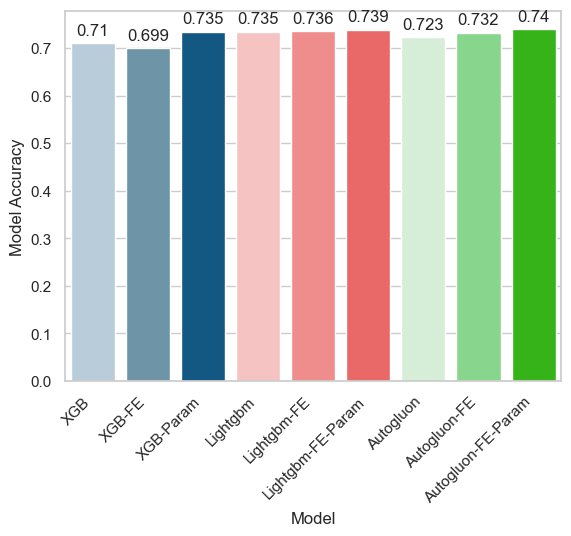

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 샘플 데이터 생성
categories = ['XGB', 'XGB-FE','XGB-Param' , 
             'Lightgbm', 'Lightgbm-FE', 'Lightgbm-FE-Param',
              'Autogluon', 'Autogluon-FE', 'Autogluon-FE-Param'
              ]
values = [0.7103882476390346,  0.6993006993006993, 0.7345225603357818,
          0.7345225603357818, 0.7355718782791185, 0.7387198321091291,
          0.7229800629590766, 0.7324239244491081 , 0.7397691500524659,]

# Seaborn 스타일 설정 (선택사항)
sns.set(style="whitegrid")

# 색상 설정 (RGB values normalized to [0, 1])
colors = [(179/255, 205/255, 224/255), (100/255, 151/255, 177/255),(0/255, 91/255, 150/255),
          (255/255, 186/255, 186/255), (255/255, 123/255, 123/255), (255/255, 82/255, 82/255),
          (210/255, 242/255, 212/255), (123/255, 227/255, 130/255),(38/255, 204/255, 0/255)]
         

# 막대그래프 그리기
ax = sns.barplot(x=categories, y=values, palette=colors)

# x축 레이블의 각도 조절
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 막대 위에 수치 표시
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=12)

# 그래프에 제목 추가
plt.title('')

# x축, y축에 레이블 추가 (선택사항)
plt.xlabel('Model')
plt.ylabel('Model Accuracy')

# 그래프 표시
plt.show()

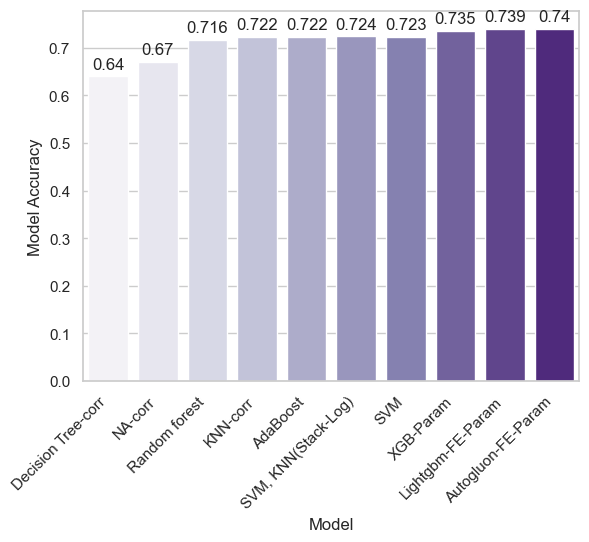

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 샘플 데이터 생성
categories = ['Decision Tree-corr','NA-corr', 'Random forest', 
              'KNN-corr', 'AdaBoost','SVM, KNN(Stack-Log)',  'SVM', 
              'XGB-Param','Lightgbm-FE-Param','Autogluon-FE-Param']
values = [ 0.6398601398601399, 0.66993006993007,0.7160839160839161,
         0.7223776223776224, 0.7223776223776224, 0.72377622377622370,  0.7230769230769231,
         0.7345225603357818, 0.7387198321091291,0.7397691500524659]

# Decision-na-random-knn-ada-stack-svm

# Seaborn 스타일 설정 (선택사항)
sns.set(style="whitegrid")

# 막대그래프 그리기
ax = sns.barplot(x=categories, y=values, palette="Purples")

# x축 레이블의 각도 조절
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 막대 위에 수치 표시
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=12)

# 그래프에 제목 추가
plt.title('')

# x축, y축에 레이블 추가 (선택사항)
plt.xlabel('Model')
plt.ylabel('Model Accuracy')

# 그래프 표시
plt.show()